# APU: Analitical Propagation Uncertainty - Deep Learning
The chosen dataset was the Airfoil Self-Noise Data Set (http://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise), taken from the UCI Machine Learning Repository. The selected predicted variable was "Pressure," and all other variables were considered as predictor variables.



# Manipulating the data

In [1]:
import jupyterthemes as jt

In [2]:
jt.install_theme(theme='grade3')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-learn

%matplotlib inline
%reload_ext autoreload
%autoreload 2


# Import of the data  

In [2]:
df=pd.read_csv('airfoil.csv')

In [3]:
df

,Frequency,Angle,Length,Velocity,Suction Side,Pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [4]:
df.describe()

,Frequency,Angle,Length,Velocity,Suction Side,Pressure
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


# Normalization of the data 

In [6]:
from sklearn.preprocessing import MinMaxScaler 

In [7]:
scaler=MinMaxScaler(feature_range=(0,1))
df_n = scaler.fit_transform(df)


In [8]:
df_n=pd.DataFrame(df_n)

# Splitting the data into input (x) and output (y) for training and testing data

In [9]:
y=df_n[5]

In [10]:
X=df_n[df_n.columns[0:5]]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, shuffle=True, random_state=32)

In [12]:
X_test

,0,1,2,3,4
1154,0.040404,0.783784,0.000000,1.000000,0.270697
475,0.116162,0.000000,0.454545,0.601010,0.022858
458,0.090909,0.000000,0.454545,1.000000,0.020653
43,0.242424,0.000000,1.000000,0.199495,0.046555
533,0.116162,0.121622,0.454545,0.199495,0.043912
1366,0.070707,0.301802,0.272727,0.199495,0.092743
537,0.308081,0.121622,0.454545,0.199495,0.043912
273,0.015152,0.090090,0.727273,0.199495,0.052836
428,0.030303,0.328829,0.727273,0.199495,0.205952
381,0.040404,0.238739,0.727273,0.199495,0.098992


# Construction of the Neural Network 

In [13]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2

In [14]:
n_input = 5  # numero de entradas das rede neural 
num_out = 1
p_dropout = 0.5 # probabilidade dropout 

lbd = 1e-4  # L2- força de regularização 

model = Sequential()
model.add(Dropout(.05, input_shape=(n_input,)))
model.add(Dense(100, activation='relu', input_shape=(n_input,), kernel_regularizer=l2(lbd)))
model.add(Dropout(p_dropout))
model.add(Dense(100, activation='relu', kernel_regularizer=l2(lbd)))
model.add(Dropout(p_dropout))
model.add(Dense(num_out, activation=None))
model.summary()

opt = Adam(lr=1e-3) 

model.compile(loss='mean_squared_error',
              optimizer=opt,
              metrics=['mean_absolute_error'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 5)                 0         
                                                                 
 dense (Dense)               (None, 100)               600       
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,801
Trainable params: 10,801
Non-traina

C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


# Training the neural network

In [15]:
epochs = 10000
model.fit(X_train, y_train,
            batch_size=X_train.shape[0] // 1,
            epochs=epochs,
            verbose=0)

# Evaluating the model's performance 

In [16]:
from sklearn import metrics

y_hat_train = model.predict(X_train)


46/46 [==============================] - 0s 598us/step


In [17]:
y_hat_test = model.predict(X_test)


1/1 [==============================] - 0s 44ms/step


# Training metrics

In [18]:
MAE_T=metrics.mean_absolute_error(y_train, y_hat_train)
R2_T=metrics.r2_score(y_train, y_hat_train);
RMSE_T=metrics.mean_squared_error(y_train, y_hat_train)

In [19]:
MAE_T,R2_T,RMSE_T

(0.04905784880487336, 0.8725330597614418, 0.004321856682062281)

# Test metrics

In [20]:
MAE_t=metrics.mean_absolute_error(y_test, y_hat_test)
R2_t=metrics.r2_score(y_test, y_hat_test);
RMSE_t=metrics.mean_squared_error(y_test, y_hat_test)

In [21]:
MAE_t,R2_t,RMSE_t

(0.043584728653596826, 0.8643701873950855, 0.0027352410760687743)

# Determination of random error and systematic error across the entire dataset

In [22]:
previsão=model.predict(X[:1503])

47/47 [==============================] - 0s 607us/step


In [23]:
colnames=["Predict2"]

previsão2=pd.DataFrame(previsão, columns=colnames)

df.resume4=pd.concat([X,y,previsão2],axis=1)

erro=df.resume4['Predict2']-df.resume4[5]

erro.describe()

es=erro.loc[:,].mean()

ea=erro.loc[:,].std()


C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_5640\3222474720.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.resume4=pd.concat([X,y,previsão2],axis=1)


In [24]:
ea

0.06440987101103413

In [25]:
es

0.011969162005230367

In [26]:
erro.describe()

count    1503.000000
mean        0.011969
std         0.064410
min        -0.349985
25%        -0.024106
50%         0.012833
75%         0.047264
max         0.249854
dtype: float64

# Creating a graph by sorting the data in order and plotting the actual and predicted values in the test set

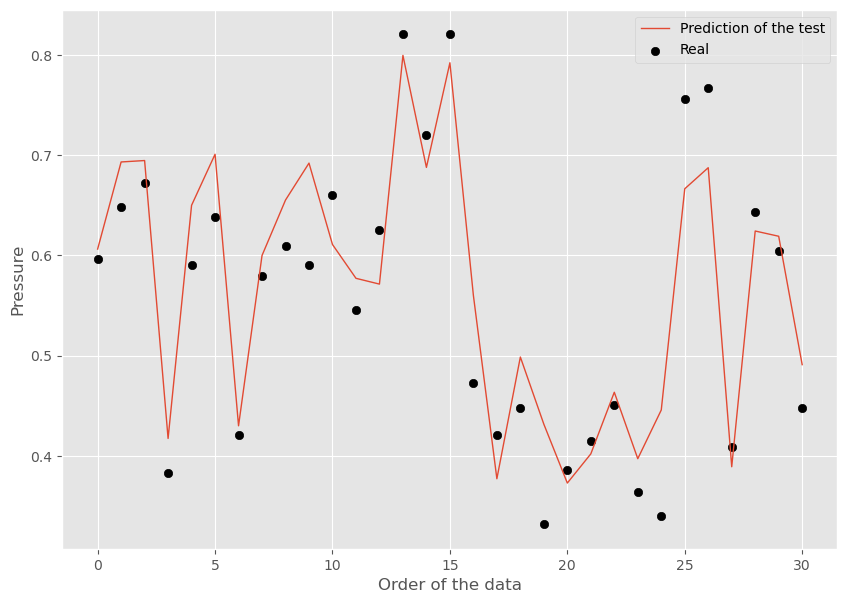

In [27]:
# avaliação conjunto de teste
n = 31
plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(range(n), y_hat_test, label="Prediction of the test", lw=1)
plt.scatter(range(n), y_test, color="black", label="Real")
plt.ylabel("Pressure")
plt.xlabel("Order of the data")
plt.legend(loc="best")
f.savefig("rnn_demanda1.png")
plt.show()

# APU: Analitical Propagation Uncertainty - Deep Learning

In [28]:
X_test=X_test.reset_index(drop=True)#resetando o indice dos valores aleatórios sorteados para teste

In [29]:
y_test=y_test.reset_index(drop=True)

In [30]:

 previsão=model.predict(X_test[:31])#criando a coluna de previsão dos valores de teste pelo modelo treinado


1/1 [==============================] - 0s 19ms/step


In [31]:
colnames=["Predict"]

In [32]:
previsão1=pd.DataFrame(previsão, columns=colnames)

In [33]:
df.resume3=pd.concat([X_test,y_test,previsão1],axis=1)

C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_5640\3988421289.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.resume3=pd.concat([X_test,y_test,previsão1],axis=1)


In [34]:
df.resume3

,0,1,2,3,4,5,Predict
0,0.040404,0.783784,0.000000,1.000000,0.270697,0.596591,0.606187
1,0.116162,0.000000,0.454545,0.601010,0.022858,0.648363,0.693081
2,0.090909,0.000000,0.454545,1.000000,0.020653,0.671870,0.694494
3,0.242424,0.000000,1.000000,0.199495,0.046555,0.383147,0.417326
4,0.116162,0.121622,0.454545,0.199495,0.043912,0.590555,0.649842
5,0.070707,0.301802,0.272727,0.199495,0.092743,0.638046,0.700766
6,0.308081,0.121622,0.454545,0.199495,0.043912,0.420906,0.429945
7,0.015152,0.090090,0.727273,0.199495,0.052836,0.579068,0.599793
8,0.030303,0.328829,0.727273,0.199495,0.205952,0.609434,0.655089
9,0.040404,0.238739,0.727273,0.199495,0.098992,0.590342,0.691929


# Determination of partial derivatives using the finite difference method.

In [35]:
#criar a coluna de predict delta x1 

In [36]:
#incerteza de x1 (medidor de frequência) * h=ux1

In [37]:
h1=0.000001
h2=0.000001
h3=0.000001
h4=0.000001
h5=0.000001

In [38]:
deltax1=X_test[:31]+np.array([h1,0,0,0,0])

In [39]:
previsãodeltax1=model.predict(deltax1[:31])


1/1 [==============================] - 0s 17ms/step


In [40]:
colnames=["Predict Deltax1"]
previsãodeltax1=pd.DataFrame(previsãodeltax1, columns=colnames)

In [41]:
#criar a coluna de predict delta x2

In [42]:
#incerteza de x2 (medidor de ângulo)

In [43]:
deltax2=X_test[:31]+np.array([0,h2,0,0,0])

In [44]:
previsãodeltax2=model.predict(deltax2[:31])

1/1 [==============================] - 0s 16ms/step


In [45]:
colnames=["Predict Deltax2"]
previsãodeltax2=pd.DataFrame(previsãodeltax2, columns=colnames)

In [46]:
#criar a coluna de predict delta x3

In [47]:
#incerteza de x3 (medidor de comprimento)

In [48]:
deltax3=X_test[:31]+np.array([0,0,h3,0,0])

In [49]:
previsãodeltax3=model.predict(deltax3[:31])

1/1 [==============================] - 0s 15ms/step


In [50]:
colnames=["Predict Deltax3"]
previsãodeltax3=pd.DataFrame(previsãodeltax3, columns=colnames)

In [51]:
#criar a coluna de predict delta x4

In [52]:
#incerteza de x4 (medidor de velocidade).

In [53]:
deltax4=X_test[:31]+np.array([0,0,0,h4,0])

In [54]:
previsãodeltax4=model.predict(deltax4[:31])

1/1 [==============================] - 0s 15ms/step


In [55]:
colnames=["Predict Deltax4"]
previsãodeltax4=pd.DataFrame(previsãodeltax4, columns=colnames)

In [56]:
#criar a coluna de predict delta x5

In [57]:
#incerteza de x5 (medidor de sucção)

In [58]:
deltax5=X_test[:31]+np.array([0,0,0,0,h5])

In [59]:
previsãodeltax5=model.predict(deltax5[:31])

1/1 [==============================] - 0s 16ms/step


In [60]:
colnames=["Predict Deltax5"]
previsãodeltax5=pd.DataFrame(previsãodeltax5, columns=colnames)

In [61]:
df.total=pd.concat([y_test,previsão1,previsãodeltax1,previsãodeltax2,previsãodeltax3,previsãodeltax4,previsãodeltax5],axis=1)

C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_5640\2651709830.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.total=pd.concat([y_test,previsão1,previsãodeltax1,previsãodeltax2,previsãodeltax3,previsãodeltax4,previsãodeltax5],axis=1)


In [62]:
df.total['c1']=(df.total['Predict Deltax1']-df.total['Predict'])/h1


In [63]:
df.total['c2']=(df.total['Predict Deltax2']-df.total['Predict'])/h2


In [64]:
df.total['c3']=(df.total['Predict Deltax3']-df.total['Predict'])/h3

In [65]:
df.total['c4']=(df.total['Predict Deltax4']-df.total['Predict'])/h4

In [66]:
df.total['c5']=(df.total['Predict Deltax5']-df.total['Predict'])/h5

In [67]:
df.total

,5,Predict,Predict Deltax1,Predict Deltax2,Predict Deltax3,Predict Deltax4,Predict Deltax5,c1,c2,c3,c4,c5
0,0.596591,0.606187,0.606190,0.606186,0.606187,0.606187,0.606186,3.159046,-0.536442,0.655651,0.119209,-0.119209
1,0.648363,0.693081,0.693081,0.693082,0.693081,0.693082,0.693081,-0.238419,0.119209,-0.238419,0.059605,-0.298023
2,0.671870,0.694494,0.694495,0.694494,0.694494,0.694494,0.694494,0.417233,0.178814,-0.119209,0.059605,0.238419
3,0.383147,0.417326,0.417325,0.417326,0.417326,0.417326,0.417325,-0.655651,-0.208616,-0.119209,0.059605,-0.715256
4,0.590555,0.649842,0.649840,0.649841,0.649841,0.649842,0.649840,-1.609325,-0.119209,-0.417233,0.119209,-1.311302
5,0.638046,0.700766,0.700763,0.700766,0.700766,0.700766,0.700765,-3.635883,-0.178814,-0.298023,0.059605,-1.132488
6,0.420906,0.429945,0.429944,0.429945,0.429945,0.429945,0.429944,-0.894070,-0.447035,-0.149012,0.089407,-1.341105
7,0.579068,0.599793,0.599799,0.599793,0.599793,0.599793,0.599793,6.198883,0.178814,0.000000,0.059605,0.655651
8,0.609434,0.655089,0.655085,0.655089,0.655089,0.655090,0.655089,-4.470348,-0.476837,-0.357628,0.119209,-0.357628
9,0.590342,0.691929,0.691926,0.691929,0.691929,0.691930,0.691929,-3.099442,-0.238419,-0.357628,0.059605,-0.357628


In [68]:
#cálculo da incerteza combinada : 
#x1: medidor de frequencia sonora.0,034% do valor médio da escala
#x2: medidor de angulo :0,4% do valor médio da escala
#x3: medidor de comprimento 0,14% do valor médio da escala
#x4: medidor de velocidade do vento Pesquisando a incerteza em tuneis de vento chega a 1,9% do valor médio da escala
#x5: medidor de sucção 10% do valor médio da escala
#y: pressão somora: 0,8% do valor médio da escala
 

In [69]:
upx1=0.0003468*0.5/2
upx2=0.00488*0.5/2
upx3=0.001470*0.5/2
upx4=0.01966*0.5/2
upx5=0.1*0.5/2
upy=0.008*0.5/2

# Determination of the correlation between input variables

In [70]:
df_n.rename(columns={
    0: 'Frequency',1:'Angle',2:'Length',3:'Velocity',4:'Suction Side',5:'Pressure'
   
},inplace=True)

In [71]:
correlation= df_n.corr()

In [72]:
correlation

,Frequency,Angle,Length,Velocity,Suction Side,Pressure
Frequency,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
Angle,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
Length,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
Velocity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
Suction Side,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
Pressure,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


In [73]:
r_12=correlation['Frequency']['Angle']

In [74]:
r_13=correlation['Frequency']['Length']

In [75]:
r_14=correlation['Frequency']['Velocity']

In [76]:
r_15=correlation['Frequency']['Suction Side']

In [77]:
r_21=correlation['Frequency']['Angle']

In [78]:
r_23=correlation['Angle']['Length']

In [79]:
r_24=correlation['Angle']['Velocity']

In [80]:
r_25=correlation['Angle']['Suction Side']

In [81]:
r_31=correlation['Frequency']['Length']

In [82]:
r_32=correlation['Angle']['Length']

In [83]:
r_34=correlation['Length']['Suction Side']

In [84]:
r_35=correlation['Length']['Velocity']

In [85]:
r_41=correlation['Frequency']['Velocity']

In [86]:
r_42=correlation['Angle']['Velocity']

In [87]:
r_43=correlation['Length']['Suction Side']

In [88]:
r_45=correlation['Velocity']['Suction Side']

In [89]:
r_51=correlation['Frequency']['Suction Side']

In [90]:
r_52=correlation['Angle']['Suction Side']

In [91]:
r_53=correlation['Length']['Velocity']

In [92]:
r_54=correlation['Velocity']['Suction Side']

<AxesSubplot:>

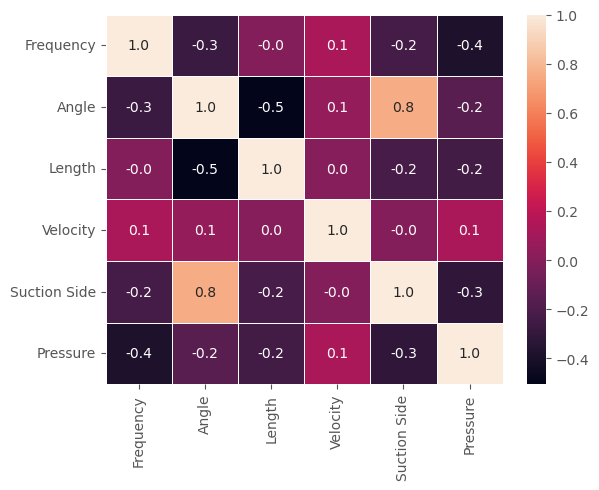

In [93]:
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)

plot

# Uncertainty with correlation

In [94]:
#incerteza combinada aleatória 
ucca=((df.total['c1']*upx1)**2+
      (df.total['c2']*upx2)**2+
      (df.total['c3']*upx3)**2+
      (df.total['c4']*upx4)**2+
      (df.total['c5']*upx5)**2+
      2*df.total['c1']*df.total['c2']*upx1*upx2*r_12+
      2*df.total['c1']*df.total['c3']*upx1*upx3*r_13+
      2*df.total['c1']*df.total['c4']*upx1*upx4*r_14+
      2*df.total['c1']*df.total['c5']*upx1*upx5*r_15+
      2*df.total['c2']*df.total['c3']*upx2*upx3*r_23+
      2*df.total['c2']*df.total['c4']*upx2*upx4*r_24+
      2*df.total['c2']*df.total['c5']*upx2*upx5*r_25+
      2*df.total['c3']*df.total['c4']*upx3*upx4*r_34+
      2*df.total['c3']*df.total['c5']*upx3*upx5*r_35+
      2*df.total['c4']*df.total['c5']*upx4*upx5*r_45
                  +upy**2)**0.5

In [95]:
#incerteza epistêmica 
ucce=((ea)**2)**0.5

In [96]:
#incerteza combinada preditiva 
ucc=(ucca**2+ucce**2)**0.5

In [97]:
#Incerteza Expandida 95,45%
U= 2*ucc+abs(es)

In [98]:
df.total['ucca']=ucca
df.total['ucce']=ucce
df.total['ucc']=ucc
df.total['U']=U

In [99]:
df.total

,5,Predict,Predict Deltax1,Predict Deltax2,Predict Deltax3,Predict Deltax4,Predict Deltax5,c1,c2,c3,c4,c5,ucca,ucce,ucc,U
0,0.596591,0.606187,0.606190,0.606186,0.606187,0.606187,0.606186,3.159046,-0.536442,0.655651,0.119209,-0.119209,0.004160,0.06441,0.064544,0.141057
1,0.648363,0.693081,0.693081,0.693082,0.693081,0.693082,0.693081,-0.238419,0.119209,-0.238419,0.059605,-0.298023,0.007614,0.06441,0.064858,0.141686
2,0.671870,0.694494,0.694495,0.694494,0.694494,0.694494,0.694494,0.417233,0.178814,-0.119209,0.059605,0.238419,0.006444,0.06441,0.064731,0.141432
3,0.383147,0.417326,0.417325,0.417326,0.417326,0.417326,0.417325,-0.655651,-0.208616,-0.119209,0.059605,-0.715256,0.018174,0.06441,0.066925,0.145819
4,0.590555,0.649842,0.649840,0.649841,0.649841,0.649842,0.649840,-1.609325,-0.119209,-0.417233,0.119209,-1.311302,0.032929,0.06441,0.072339,0.156648
5,0.638046,0.700766,0.700763,0.700766,0.700766,0.700766,0.700765,-3.635883,-0.178814,-0.298023,0.059605,-1.132488,0.028479,0.06441,0.070425,0.152819
6,0.420906,0.429945,0.429944,0.429945,0.429945,0.429945,0.429944,-0.894070,-0.447035,-0.149012,0.089407,-1.341105,0.033985,0.06441,0.072826,0.157621
7,0.579068,0.599793,0.599799,0.599793,0.599793,0.599793,0.599793,6.198883,0.178814,0.000000,0.059605,0.655651,0.016564,0.06441,0.066506,0.144981
8,0.609434,0.655089,0.655085,0.655089,0.655089,0.655090,0.655089,-4.470348,-0.476837,-0.357628,0.119209,-0.357628,0.009529,0.06441,0.065111,0.142191
9,0.590342,0.691929,0.691926,0.691929,0.691929,0.691930,0.691929,-3.099442,-0.238419,-0.357628,0.059605,-0.357628,0.009324,0.06441,0.065081,0.142132


# Monte Carlo simulator for the test data 

# simulation mc  v0 

In [100]:
i=0
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC0=np.std(previsão)
MMC0=np.mean(previsão)

31250/31250 [==============================] - 17s 540us/step


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


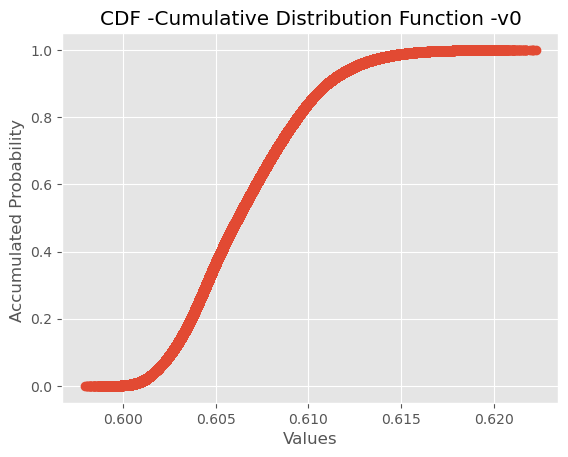

In [101]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Values')
plt.ylabel('Accumulated Probability ')
plt.title('CDF -Cumulative Distribution Function -v0')
plt.grid(True)
plt.savefig("CDF")
plt.show()




0    0.012092
dtype: float64


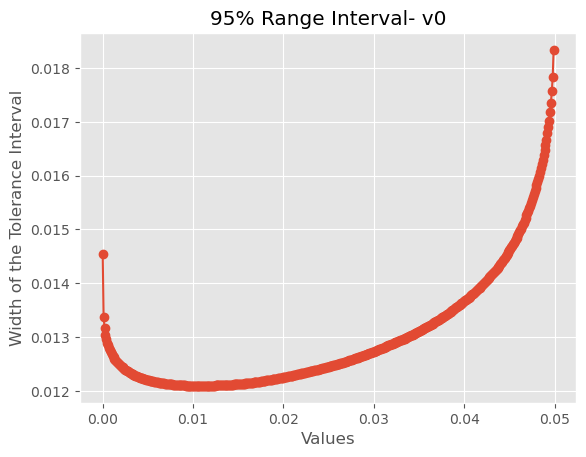

In [102]:
minvalue_IT0 = res.min()
print(minvalue_IT0)
plt.plot(x, res, marker='o')
plt.xlabel('Values')
plt.ylabel('Width of the Tolerance Interval')
plt.title('95% Range Interval- v0')
plt.grid(True)
plt.savefig("IT",format='pdf')
plt.show()

<AxesSubplot:ylabel='Count'>

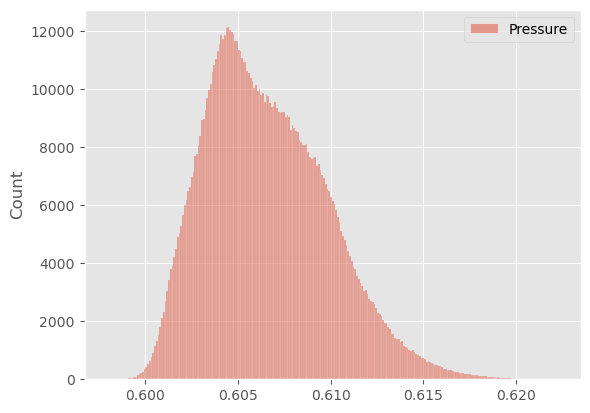

In [103]:
sns.histplot(previsão,)


# ymin e ymax 

In [104]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

from scipy.interpolate import interp1d
inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_0= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_0= inverse_cdf(percentile2)

print(ymin_0)
print(ymax_0)


0.6008367538452148
0.6129290461540222


# simulation mc  v1 

In [105]:
i=1
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC1=np.std(previsão)
MMC1=np.mean(previsão)

31250/31250 [==============================] - 17s 545us/step


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot:ylabel='Count'>

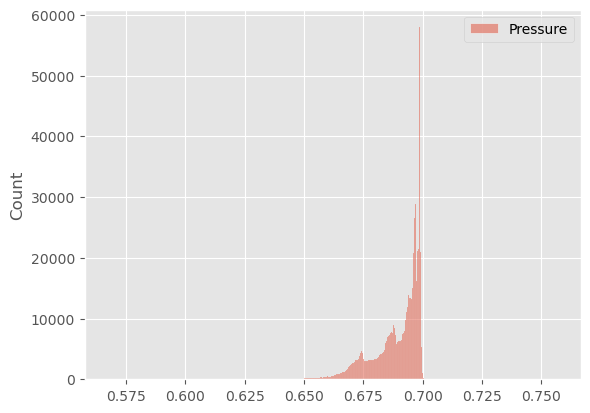

In [106]:
sns.histplot(previsão,)

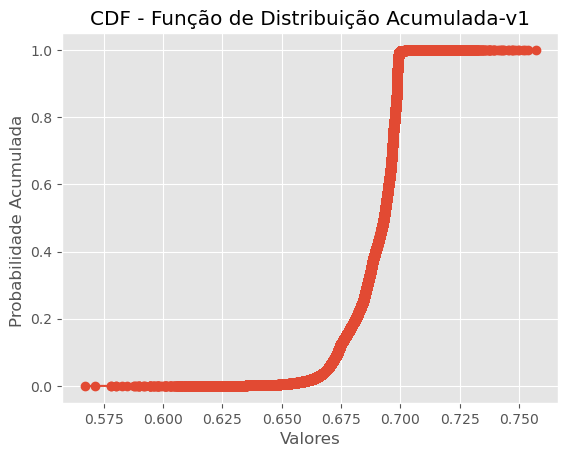

0    0.031135
dtype: float64


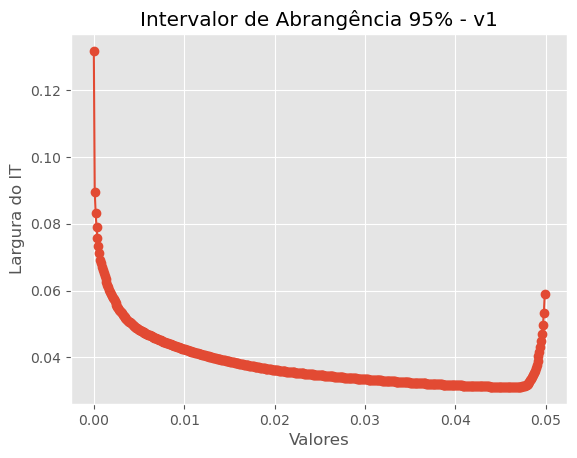

In [107]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v1')
plt.grid(True)
plt.show()

minvalue_IT1 = res.min()
print(minvalue_IT1)


plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalor de Abrangência 95% - v1')
plt.grid(True)
plt.show()

In [108]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_1= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_1= inverse_cdf(percentile2)

print(ymin_1)
print(ymax_1)


0.6687923669815063
0.6999272108078003


# simulation  mc v2 

In [109]:
i=2
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC2=np.std(previsão)
MMC2=np.mean(previsão)

31250/31250 [==============================] - 17s 543us/step


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot:ylabel='Count'>

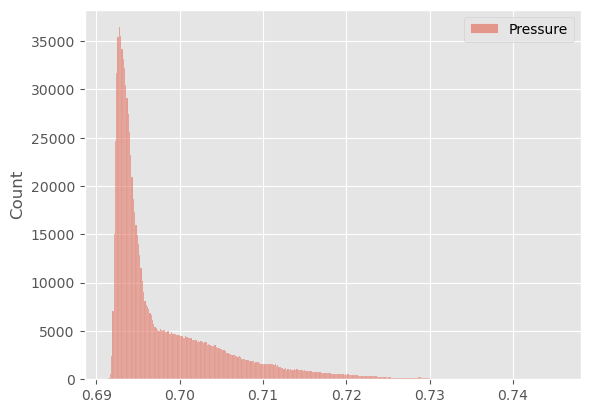

In [110]:
sns.histplot(previsão,)

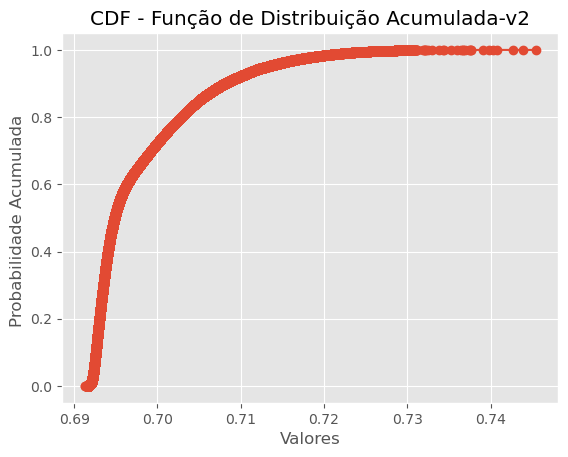

0    0.021468
dtype: float64


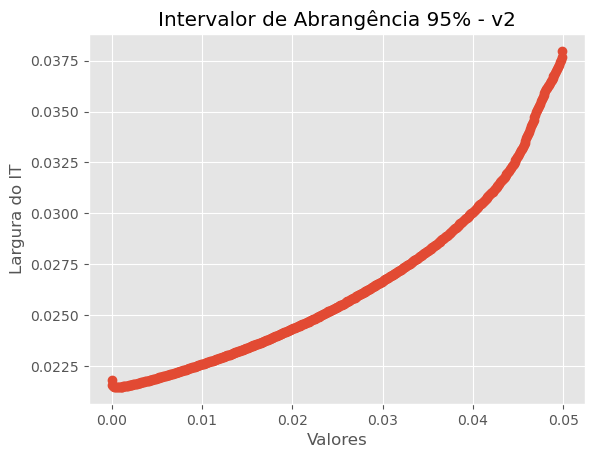

In [111]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v2')
plt.grid(True)
plt.show()

minvalue_IT2 = res.min()
print(minvalue_IT2)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalor de Abrangência 95% - v2')
plt.grid(True)
plt.show()

In [112]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_2= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_2= inverse_cdf(percentile2)

print(ymin_2)
print(ymax_2)


0.6917397975921631
0.7132077217102051


# simulation  mc v3 

In [113]:
i=3
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC3=np.std(previsão)
MMC3=np.mean(previsão)

31250/31250 [==============================] - 18s 583us/step


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot:ylabel='Count'>

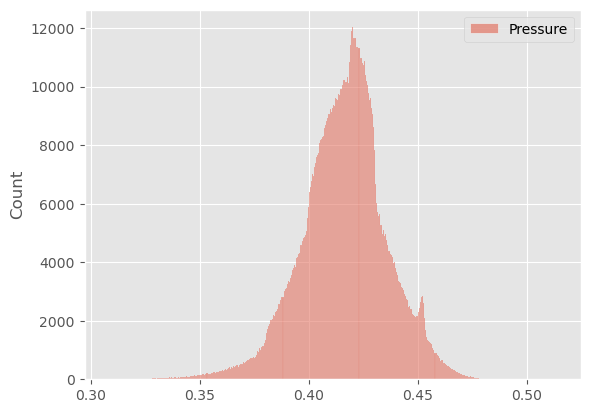

In [114]:
sns.histplot(previsão,)

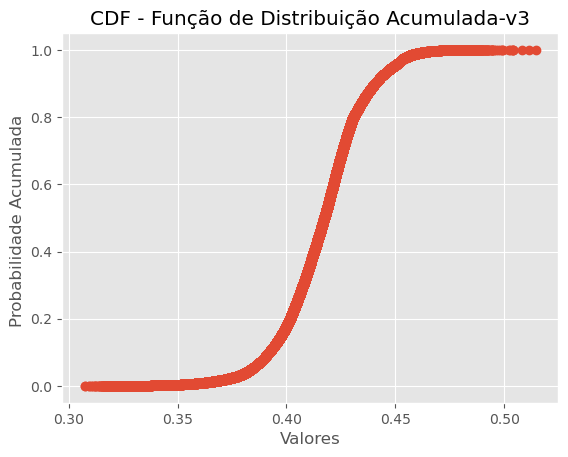

0    0.077419
dtype: float64


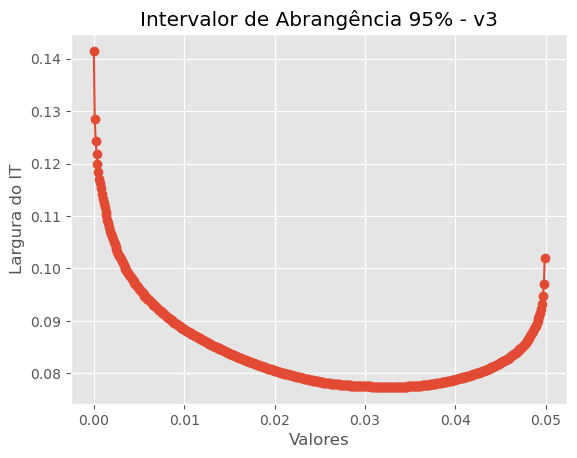

In [115]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v3')
plt.grid(True)
plt.show()

minvalue_IT3 = res.min()
print(minvalue_IT3)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalor de Abrangência 95% - v3')
plt.grid(True)
plt.show()

In [116]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_3= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_3= inverse_cdf(percentile2)

print(ymin_3)
print(ymax_3)


0.3792565166950226
0.4566754400730133


# simulation  mc v4

In [117]:
i=4
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC4=np.std(previsão)
MMC4=np.mean(previsão)

31250/31250 [==============================] - 17s 538us/step


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot:ylabel='Count'>

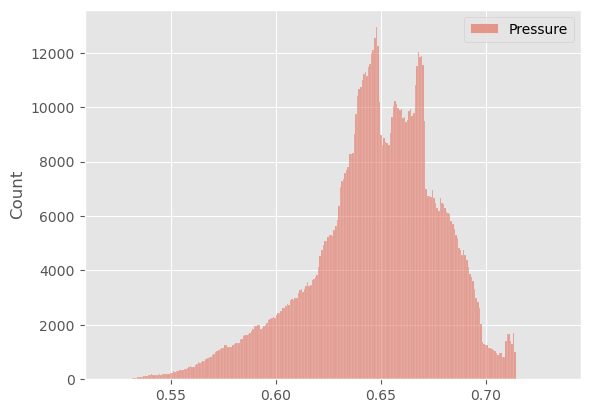

In [118]:
sns.histplot(previsão,)

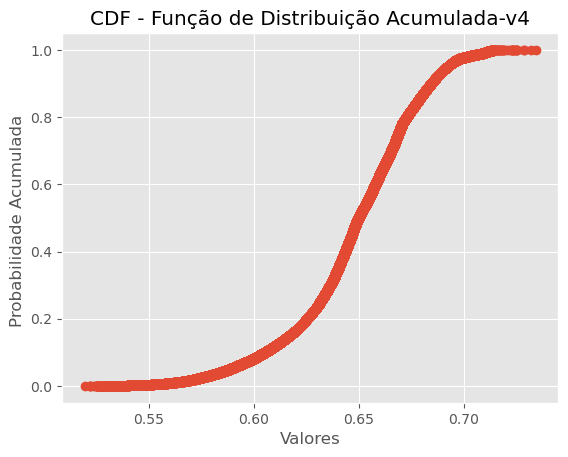

0    0.1232
dtype: float64


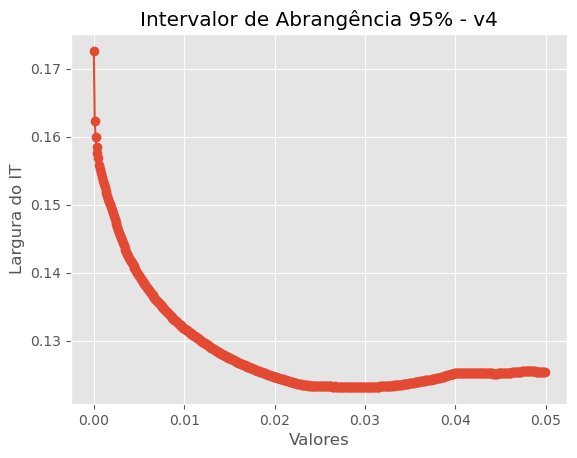

In [119]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v4')
plt.grid(True)
plt.show()

minvalue_IT4 = res.min()
print(minvalue_IT4)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalor de Abrangência 95% - v4')
plt.grid(True)
plt.show()

In [120]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_4= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_4= inverse_cdf(percentile2)

print(ymin_4)
print(ymax_4)


0.5777266025543213
0.7009276151657104


# simulation  mc v5 

In [121]:
i=5
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC5=np.std(previsão)
MMC5=np.mean(previsão)

31250/31250 [==============================] - 17s 548us/step


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot:ylabel='Count'>

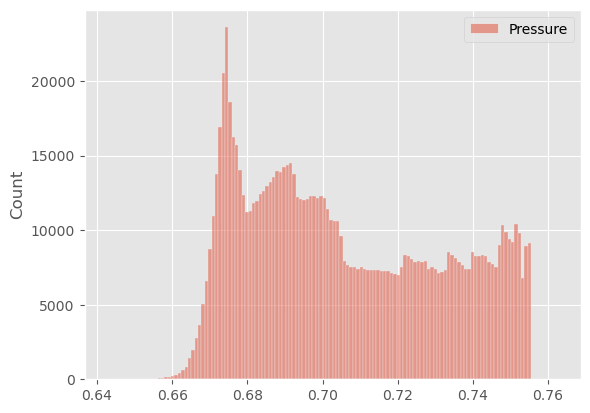

In [122]:
sns.histplot(previsão,)

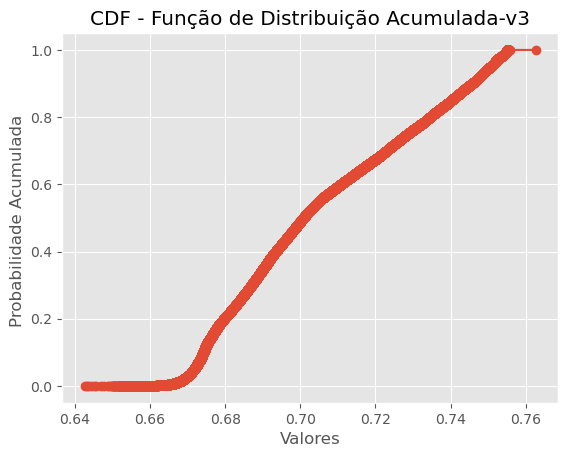

0    0.083168
dtype: float64


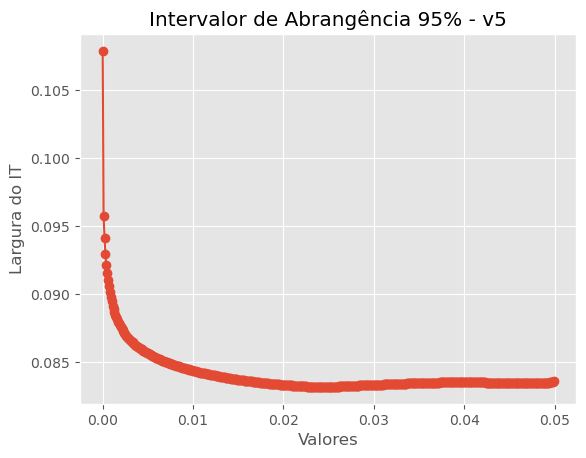

In [123]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v3')
plt.grid(True)
plt.show()

minvalue_IT5 = res.min()
print(minvalue_IT5)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalor de Abrangência 95% - v5')
plt.grid(True)
plt.show()

In [124]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_5= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_5= inverse_cdf(percentile2)

print(ymin_5)
print(ymax_5)

0.6695832014083862
0.7527509927749634


# simulation  mc v6 

In [125]:
i=6
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC6=np.std(previsão)
MMC6=np.mean(previsão)

31250/31250 [==============================] - 17s 542us/step


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot:ylabel='Count'>

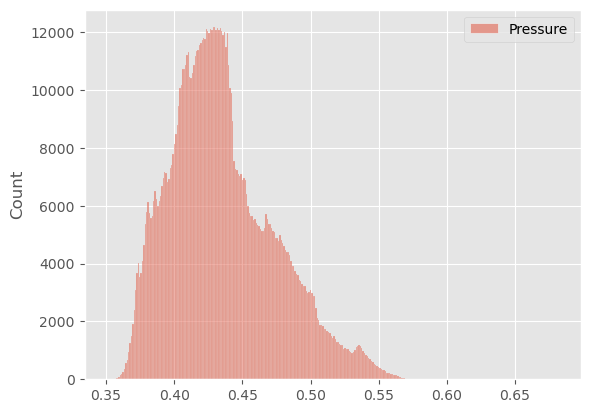

In [126]:
sns.histplot(previsão,)

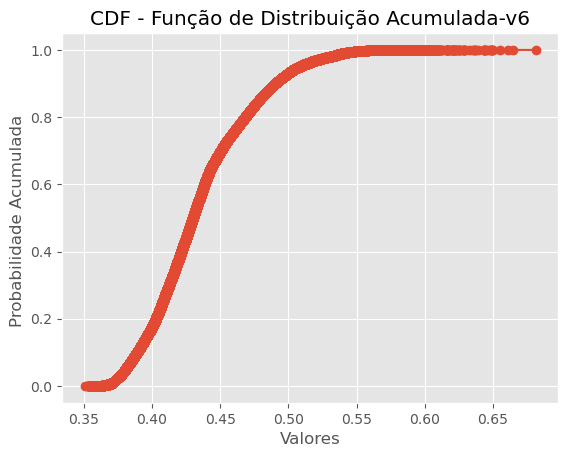

0    0.142274
dtype: float64


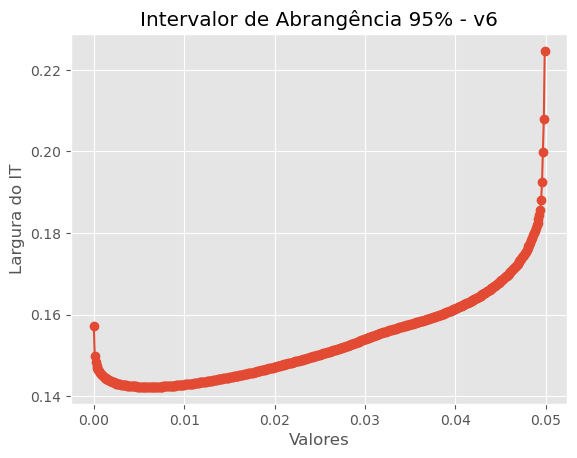

In [127]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v6')
plt.grid(True)
plt.show()

minvalue_IT6 = res.min()
print(minvalue_IT6)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalor de Abrangência 95% - v6')
plt.grid(True)
plt.show()

In [128]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_6= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_6= inverse_cdf(percentile2)
print(ymin_6)
print(ymax_6)

0.3691559433937073
0.5114295482635498


# simulação mc v7 

In [129]:
i=7
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC7=np.std(previsão)
MMC7=np.mean(previsão)

31250/31250 [==============================] - 17s 545us/step


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot:ylabel='Count'>

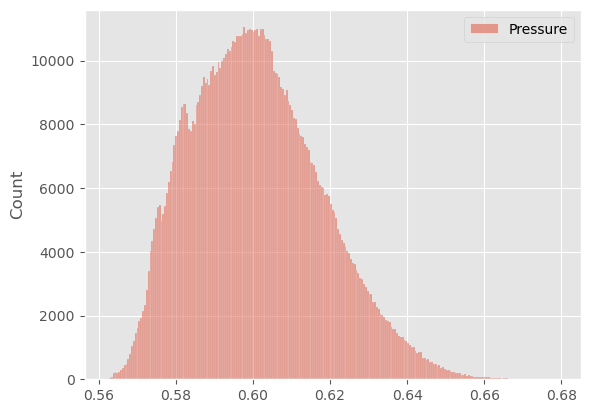

In [130]:
sns.histplot(previsão,)

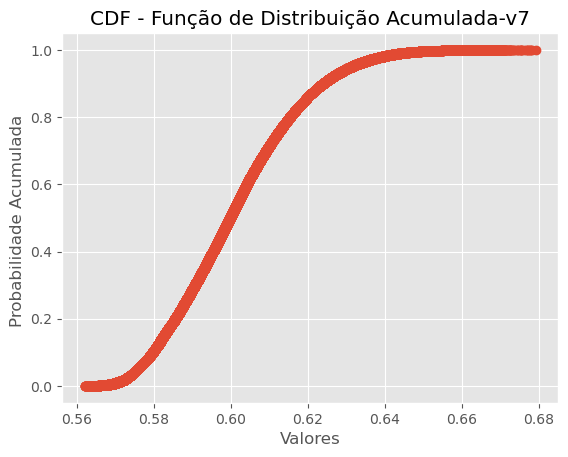

0    0.062901
dtype: float64


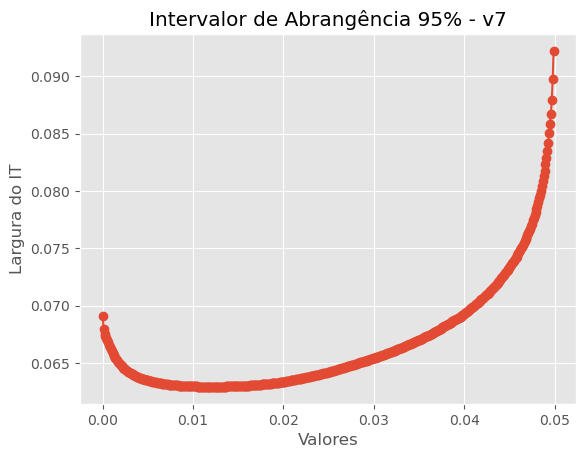

In [131]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v7')
plt.grid(True)
plt.show()

minvalue_IT7 = res.min()
print(minvalue_IT7)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalor de Abrangência 95% - v7')
plt.grid(True)
plt.show()

In [132]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_7= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_7= inverse_cdf(percentile2)
print(ymin_7)
print(ymax_7)

0.5710765719413757
0.6339772939682007


# simulação mc v8 

In [133]:
i=8
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC8=np.std(previsão)
MMC8=np.mean(previsão)

31250/31250 [==============================] - 17s 539us/step


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot:ylabel='Count'>

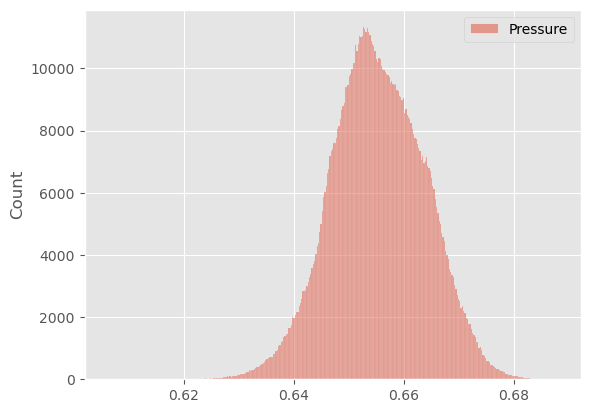

In [134]:
sns.histplot(previsão,)

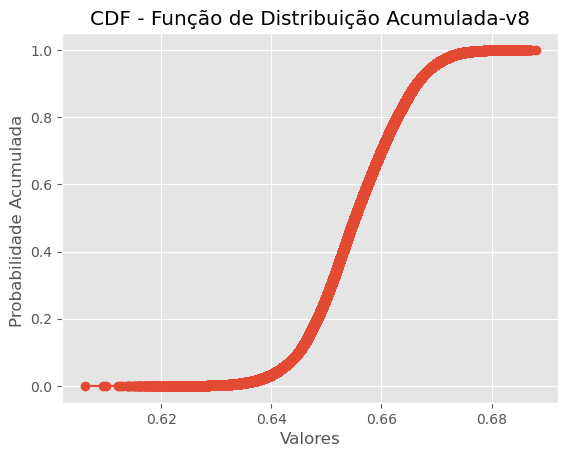

0    0.032821
dtype: float64


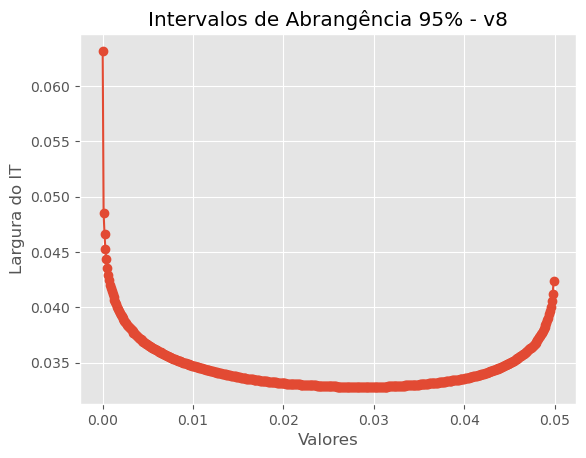

In [135]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v8')
plt.grid(True)
plt.show()

minvalue_IT8 = res.min()
print(minvalue_IT8)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v8')
plt.grid(True)
plt.show()

In [136]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_8= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_8= inverse_cdf(percentile2)
print(ymin_8)
print(ymax_8)

0.639324963092804
0.672145664691925


# simulação mc v9

In [137]:
i=9
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC9=np.std(previsão)
MMC9=np.mean(previsão)

31250/31250 [==============================] - 17s 546us/step


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot:ylabel='Count'>

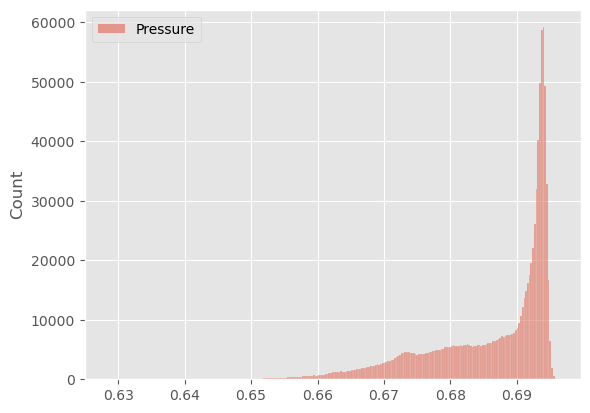

In [138]:
sns.histplot(previsão,)

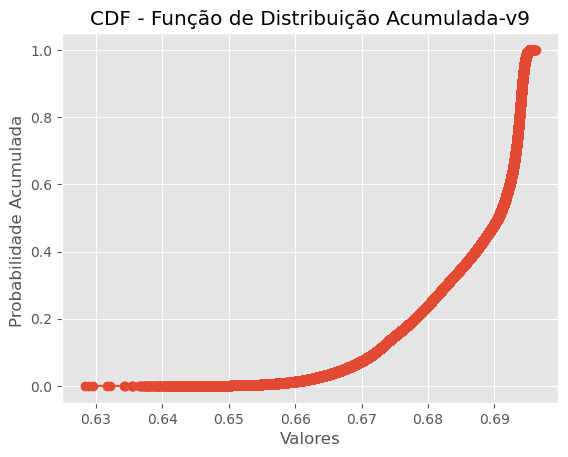

0    0.028069
dtype: float64


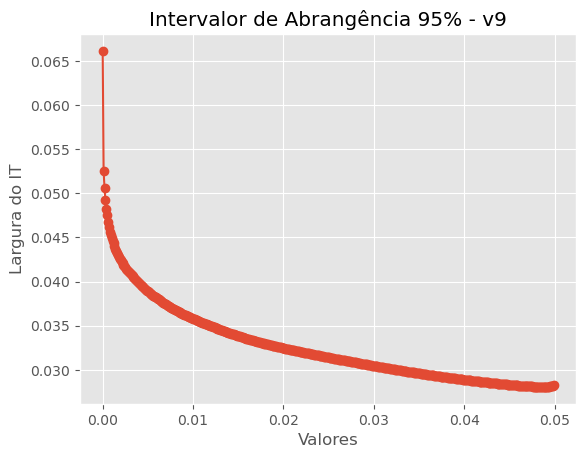

In [139]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v9')
plt.grid(True)
plt.show()

minvalue_IT9 = res.min()
print(minvalue_IT9)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalor de Abrangência 95% - v9')
plt.grid(True)
plt.show()

In [140]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_9= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_9= inverse_cdf(percentile2)
print(ymin_9)
print(ymax_9)

0.6672257781028748
0.6952949166297913


# simulação mc v10 

In [141]:
i=10
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC10=np.std(previsão)
MMC10=np.mean(previsão)

31250/31250 [==============================] - 17s 548us/step


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot:ylabel='Count'>

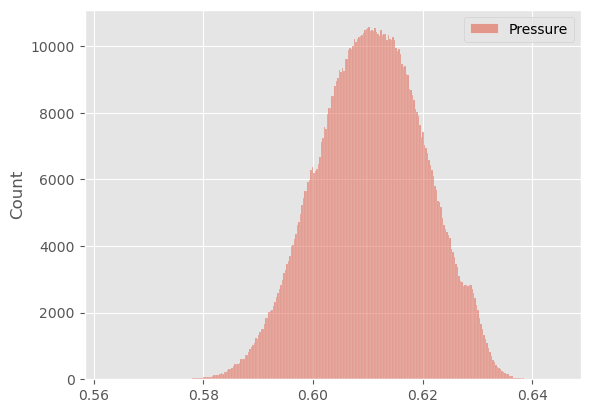

In [142]:
sns.histplot(previsão,)

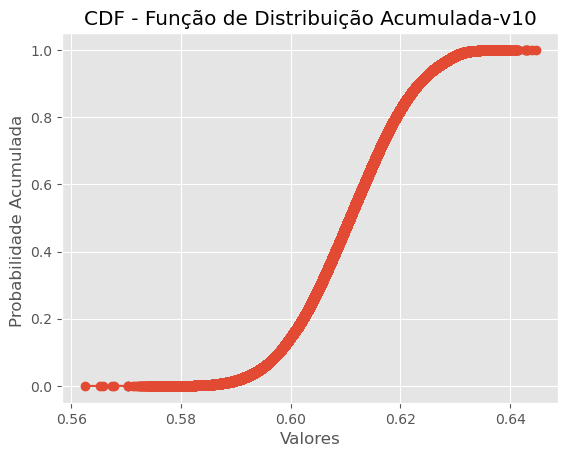

0    0.037417
dtype: float64


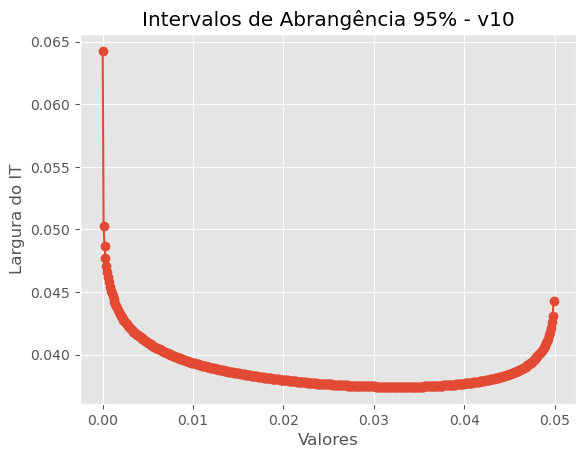

In [143]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v10')
plt.grid(True)
plt.show()

minvalue_IT10 = res.min()
print(minvalue_IT10)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v10')
plt.grid(True)
plt.show()

In [144]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_10= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_10= inverse_cdf(percentile2)
print(ymin_10)
print(ymax_10)

0.5926122069358826
0.6300288438796997


# simulação mc v11 

In [145]:
i=11
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC11=np.std(previsão)
MMC11=np.mean(previsão)

31250/31250 [==============================] - 20s 651us/step


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot:ylabel='Count'>

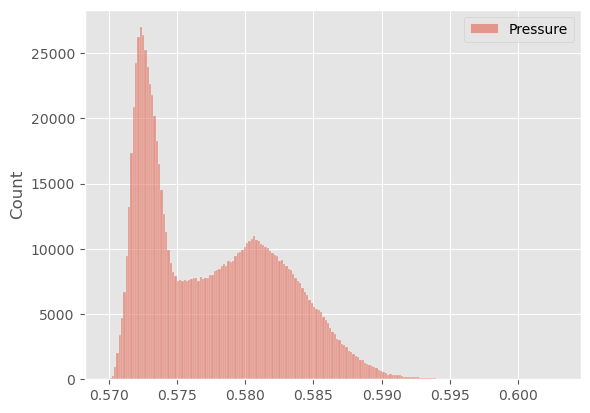

In [146]:
sns.histplot(previsão,)

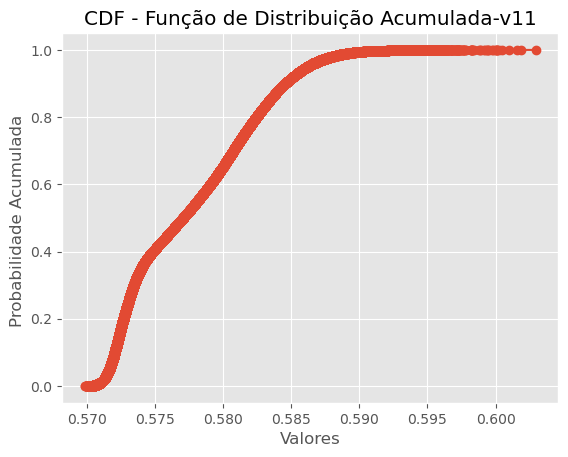

0    0.015604
dtype: float64


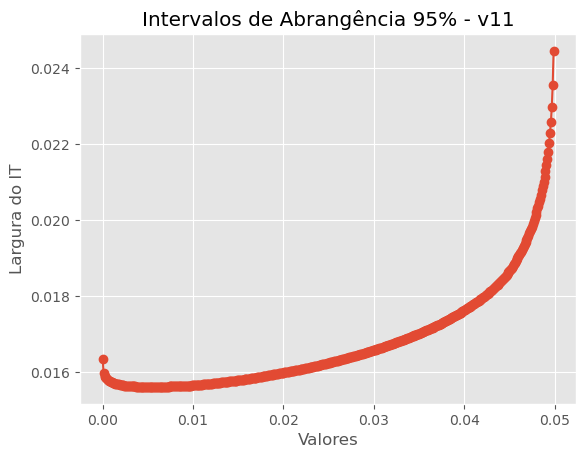

In [147]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v11')
plt.grid(True)
plt.show()

minvalue_IT11 = res.min()
print(minvalue_IT11)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v11')
plt.grid(True)
plt.show()

In [148]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_11= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_11= inverse_cdf(percentile2)
print(ymin_11)
print(ymax_11)

0.570809006690979
0.5864130258560181


# simulação mc v12 

In [149]:
i=12
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC12=np.std(previsão)
MMC12=np.mean(previsão)

31250/31250 [==============================] - 17s 552us/step


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot:ylabel='Count'>

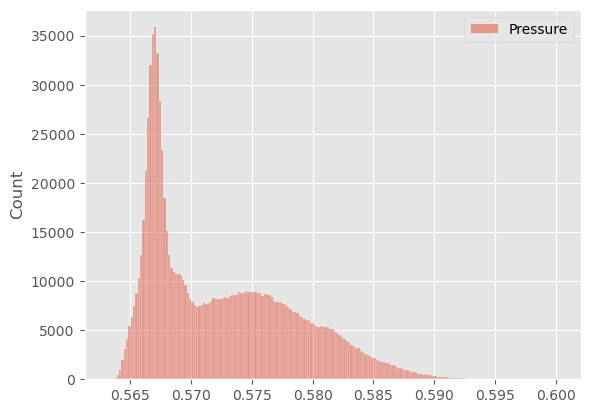

In [150]:
sns.histplot(previsão,)

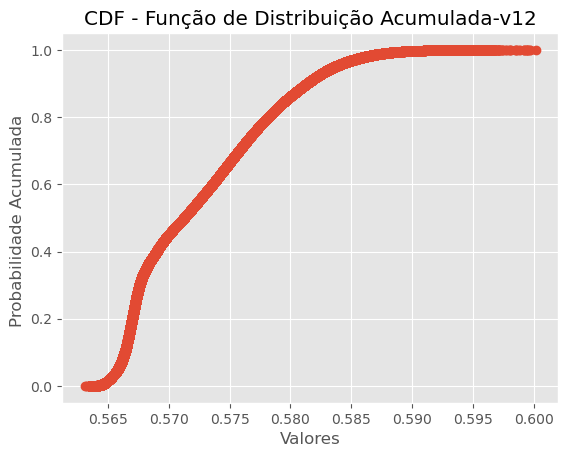

0    0.019412
dtype: float64


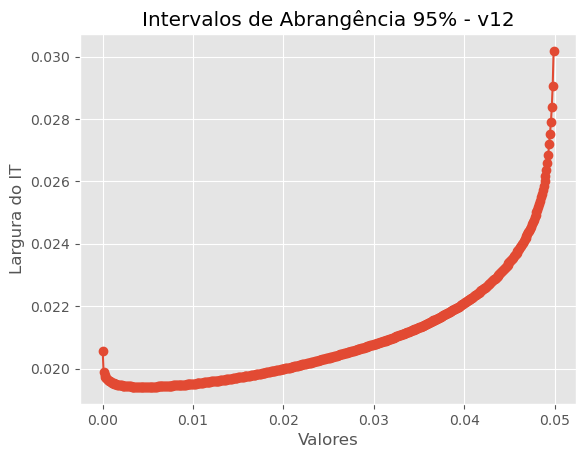

In [151]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v12')
plt.grid(True)
plt.show()

minvalue_IT12 = res.min()
print(minvalue_IT12)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v12')
plt.grid(True)
plt.show()

In [152]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_12= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_12= inverse_cdf(percentile2)
print(ymin_12)
print(ymax_12)

0.5645570755004883
0.5839690566062927


# simulação mc v13 

In [153]:
i=13
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC13=np.std(previsão)
MMC13=np.mean(previsão)

31250/31250 [==============================] - 17s 550us/step


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot:ylabel='Count'>

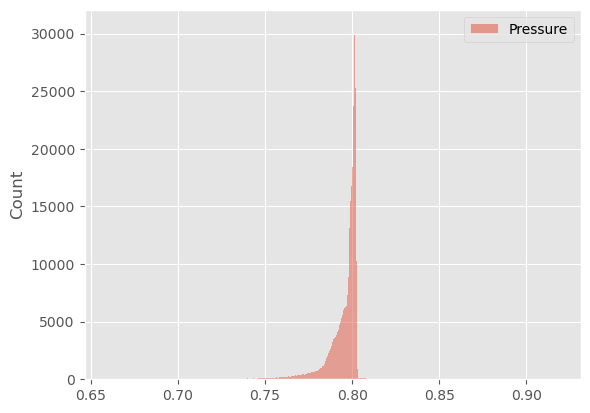

In [154]:
sns.histplot(previsão,)

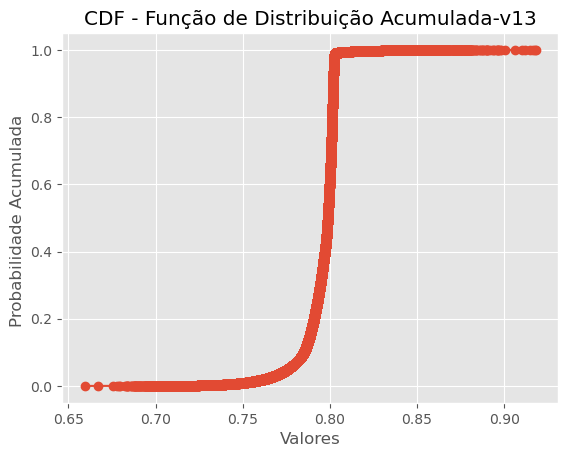

0    0.030517
dtype: float64


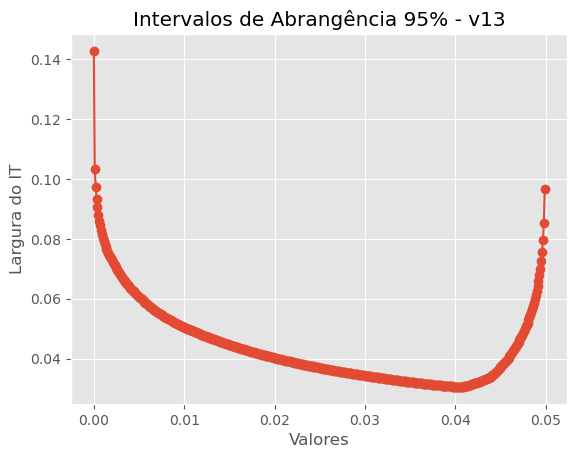

In [155]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v13')
plt.grid(True)
plt.show()

minvalue_IT13 = res.min()
print(minvalue_IT13)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v13')
plt.grid(True)
plt.show()

In [156]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_13= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_13= inverse_cdf(percentile2)
print(ymin_13)
print(ymax_13)

0.7727585434913635
0.8032752275466919


# simulação mc v14 

In [157]:
i=14
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC14=np.std(previsão)
MMC14=np.mean(previsão)

31250/31250 [==============================] - 17s 528us/step


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot:ylabel='Count'>

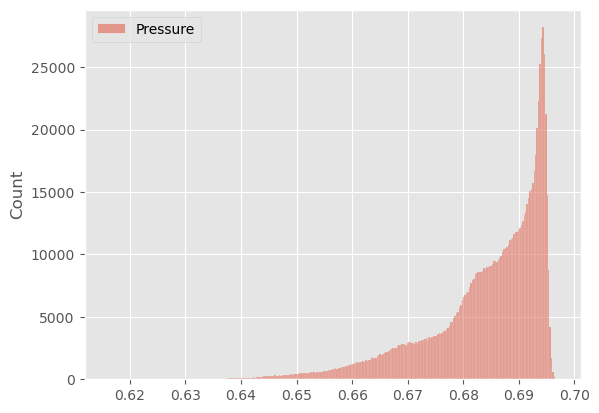

In [158]:
sns.histplot(previsão,)

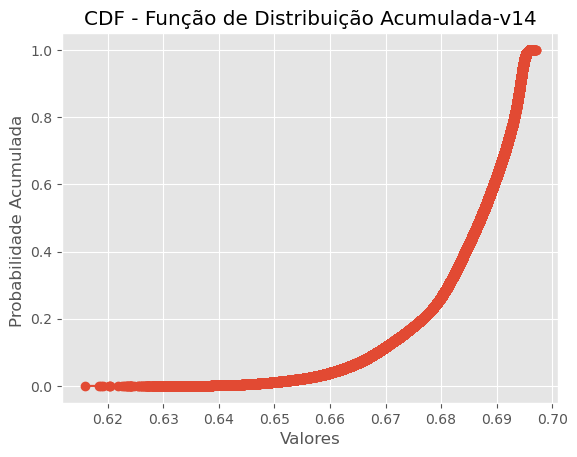

0    0.034007
dtype: float64


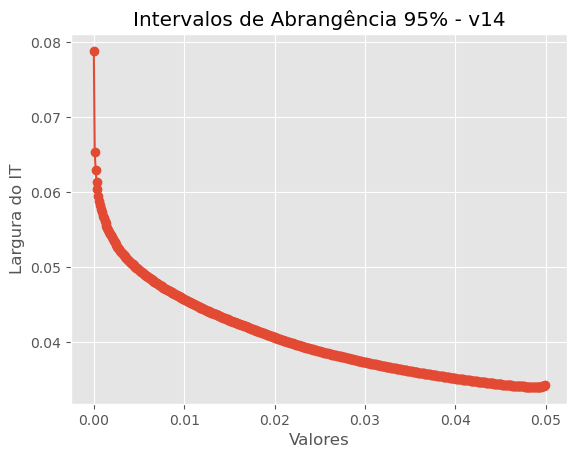

In [159]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v14')
plt.grid(True)
plt.show()

minvalue_IT14 = res.min()
print(minvalue_IT14)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v14')
plt.grid(True)
plt.show()

In [160]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_14= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_14= inverse_cdf(percentile2)
print(ymin_14)
print(ymax_14)

0.6618881225585938
0.6958951950073242


# simulação mc v15 

In [161]:
i=15
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC15=np.std(previsão)
MMC15=np.mean(previsão)

31250/31250 [==============================] - 17s 538us/step


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot:ylabel='Count'>

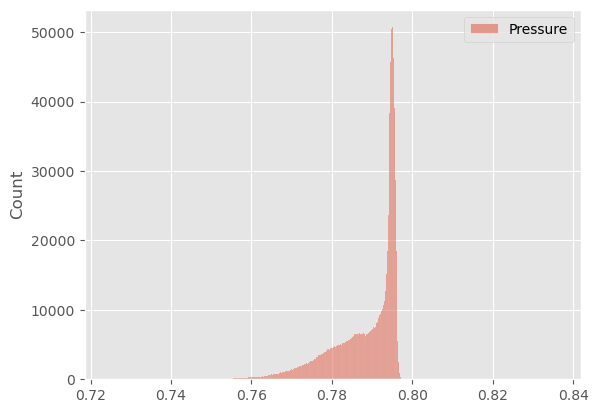

In [162]:
sns.histplot(previsão,)

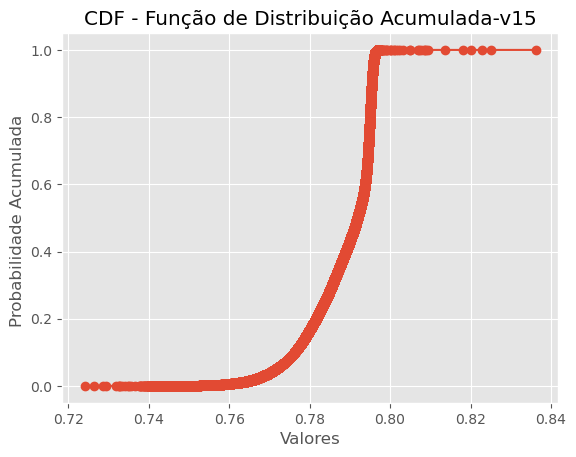

0    0.025287
dtype: float64


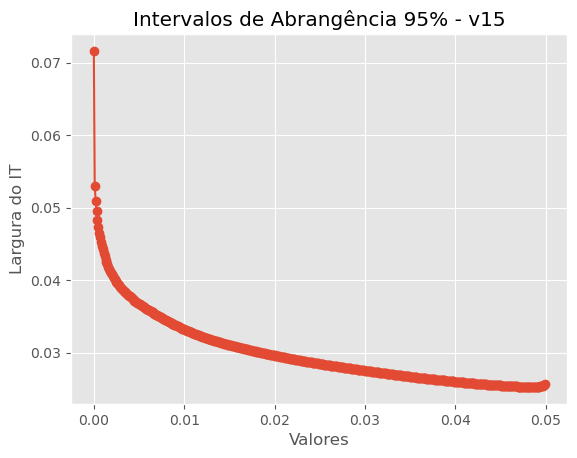

In [163]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v15')
plt.grid(True)
plt.show()

minvalue_IT15 = res.min()
print(minvalue_IT15)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v15')
plt.grid(True)
plt.show()

In [164]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_15= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_15= inverse_cdf(percentile2)
print(ymin_15)
print(ymax_15)

0.7714353799819946
0.7967227101325989


# simulação mc v16 

In [165]:
i=16
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC16=np.std(previsão)
MMC16=np.mean(previsão)

31250/31250 [==============================] - 17s 543us/step


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot:ylabel='Count'>

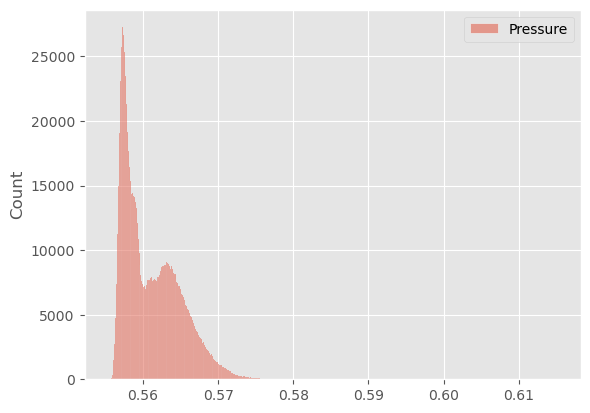

In [166]:
sns.histplot(previsão,)

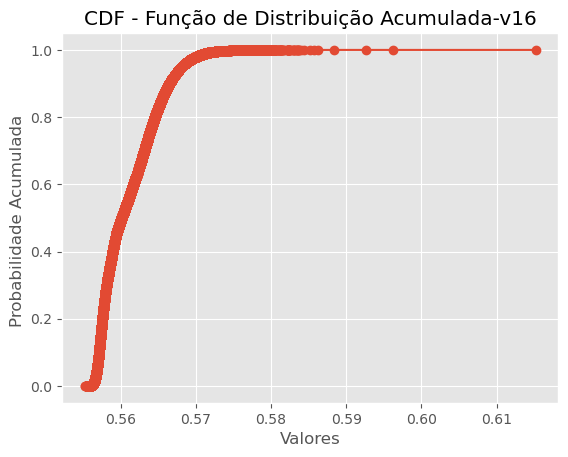

0    0.012056
dtype: float64


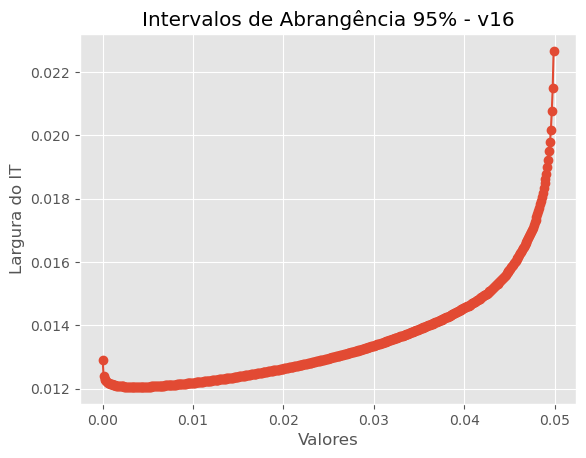

In [167]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v16')
plt.grid(True)
plt.show()

minvalue_IT16 = res.min()
print(minvalue_IT16)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v16')
plt.grid(True)
plt.show()

In [168]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_16= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_16= inverse_cdf(percentile2)
print(ymin_16)
print(ymax_16)

0.5562251806259155
0.5682815313339233


# simulação mc v17 

In [169]:
i=17
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC17=np.std(previsão)
MMC17=np.mean(previsão)

31250/31250 [==============================] - 17s 530us/step


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot:ylabel='Count'>

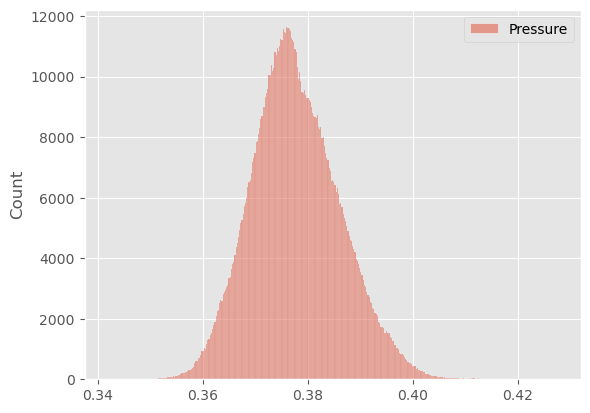

In [170]:
sns.histplot(previsão,)

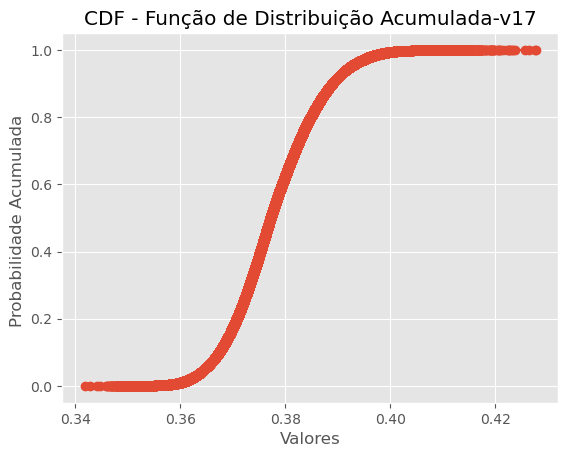

0    0.03286
dtype: float64


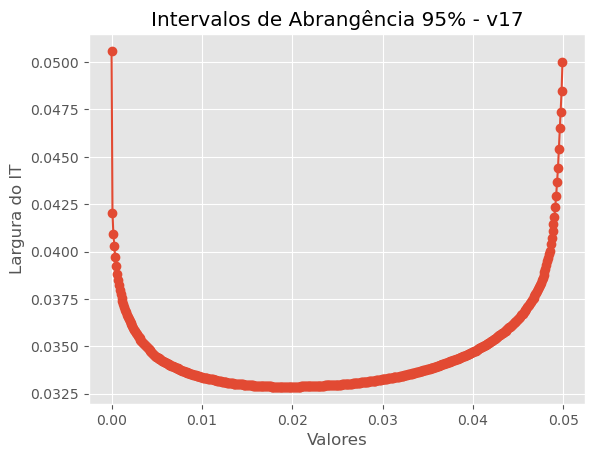

In [171]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v17')
plt.grid(True)
plt.show()

minvalue_IT17 = res.min()
print(minvalue_IT17)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v17')
plt.grid(True)
plt.show()

In [172]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_17= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_17= inverse_cdf(percentile2)
print(ymin_17)
print(ymax_17)

0.36175400018692017
0.3946138322353363


# simulação mc v18 

In [173]:
i=18
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC18=np.std(previsão)
MMC18=np.mean(previsão)

31250/31250 [==============================] - 17s 541us/step


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot:ylabel='Count'>

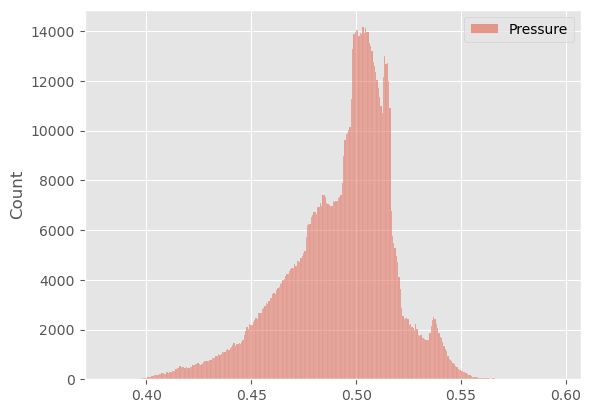

In [174]:
sns.histplot(previsão,)

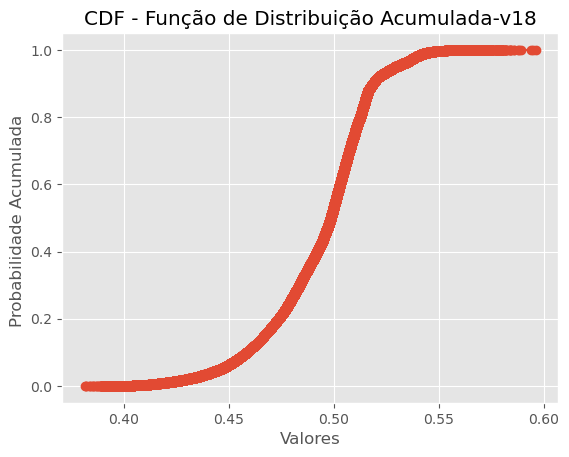

0    0.101509
dtype: float64


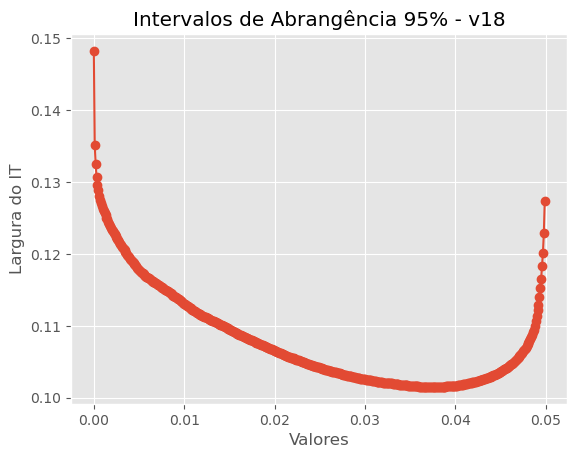

In [175]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v18')
plt.grid(True)
plt.show()

minvalue_IT18 = res.min()
print(minvalue_IT18)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v18')
plt.grid(True)
plt.show()

In [176]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_18= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_18= inverse_cdf(percentile2)
print(ymin_18)
print(ymax_18)

0.44085806608200073
0.5423668026924133


# simulação mc v19 

In [177]:
i=19
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC19=np.std(previsão)
MMC19=np.mean(previsão)

31250/31250 [==============================] - 16s 525us/step


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot:ylabel='Count'>

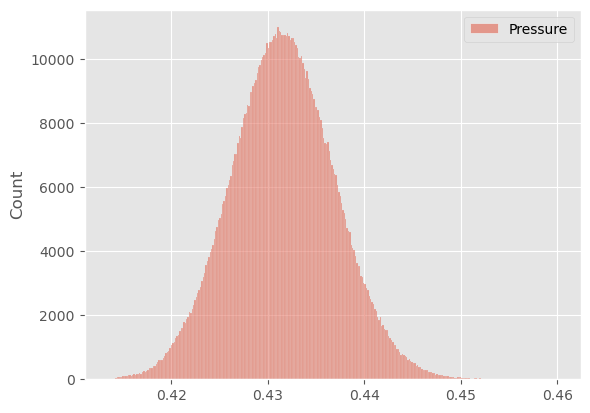

In [178]:
sns.histplot(previsão,)

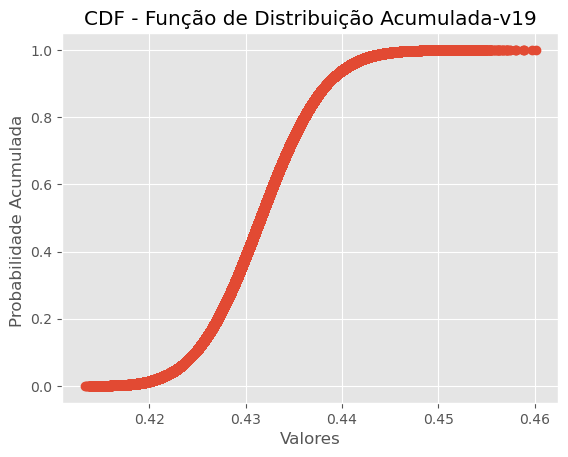

0    0.021122
dtype: float64


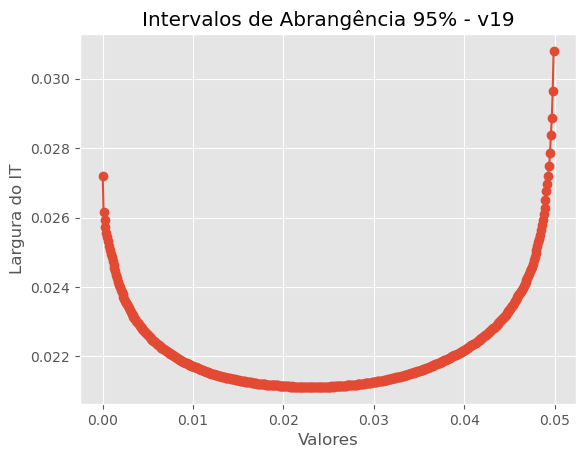

In [179]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v19')
plt.grid(True)
plt.show()

minvalue_IT19 = res.min()
print(minvalue_IT19)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v19')
plt.grid(True)
plt.show()

In [180]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_19= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_19= inverse_cdf(percentile2)
print(ymin_19)
print(ymax_19)

0.4210670292377472
0.4421888589859009


# simulação mc v20 

In [181]:
i=20
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC20=np.std(previsão)
MMC20=np.mean(previsão)

31250/31250 [==============================] - 17s 556us/step


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot:ylabel='Count'>

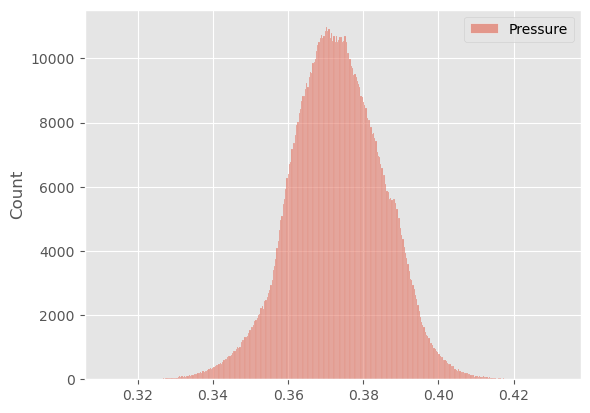

In [182]:
sns.histplot(previsão,)

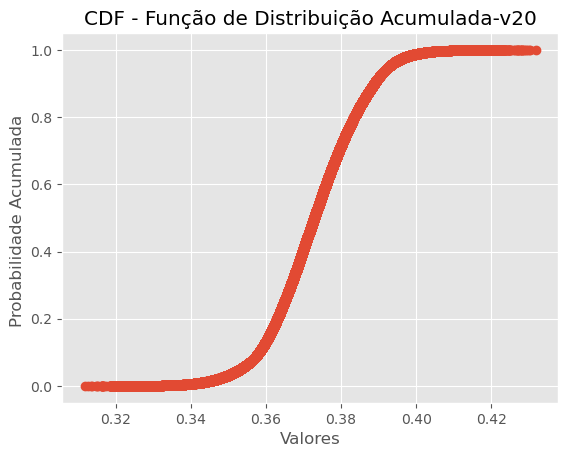

0    0.047829
dtype: float64


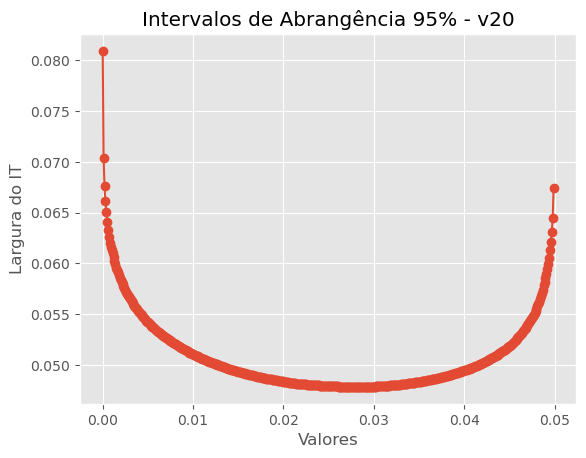

In [183]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v20')
plt.grid(True)
plt.show()

minvalue_IT20 = res.min()
print(minvalue_IT20)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v20')
plt.grid(True)
plt.show()

In [184]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_20= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_20= inverse_cdf(percentile2)
print(ymin_20)
print(ymax_20)

0.34908056259155273
0.3969094753265381


# simulação mc v21 

In [185]:
i=21
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC21=np.std(previsão)
MMC21=np.mean(previsão)

31250/31250 [==============================] - 17s 530us/step


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot:ylabel='Count'>

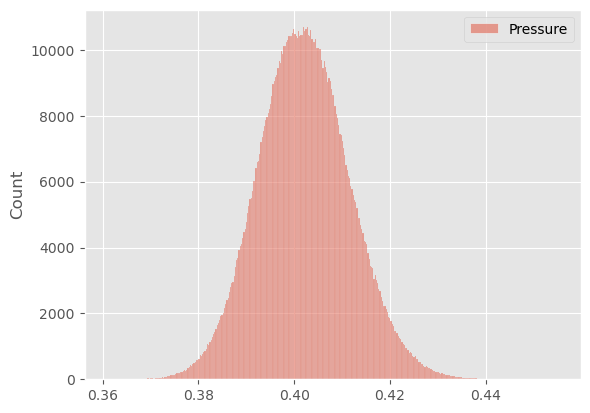

In [186]:
sns.histplot(previsão,)

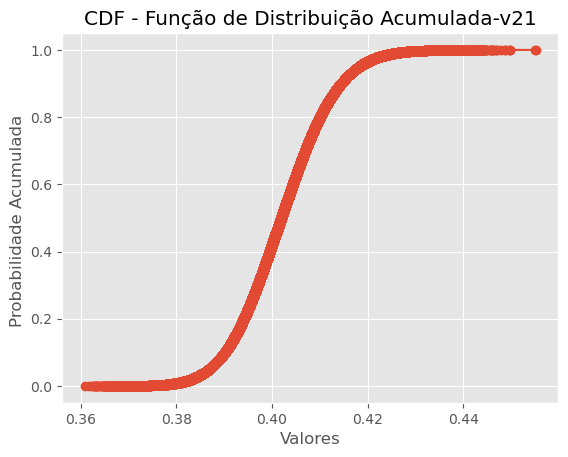

0    0.037469
dtype: float64


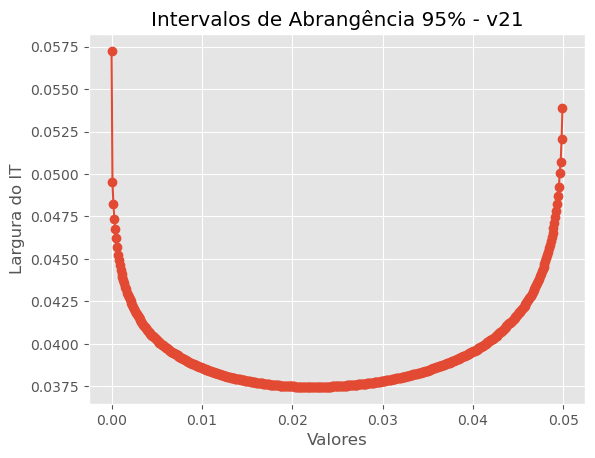

In [187]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v21')
plt.grid(True)
plt.show()

minvalue_IT21 = res.min()
print(minvalue_IT21)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v21')
plt.grid(True)
plt.show()

In [188]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_21= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_21= inverse_cdf(percentile2)
print(ymin_21)
print(ymax_21)

0.3835444450378418
0.42101359367370605


# simulação mc v22 

In [189]:
i=22
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC22=np.std(previsão)
MMC22=np.mean(previsão)

31250/31250 [==============================] - 17s 533us/step


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot:ylabel='Count'>

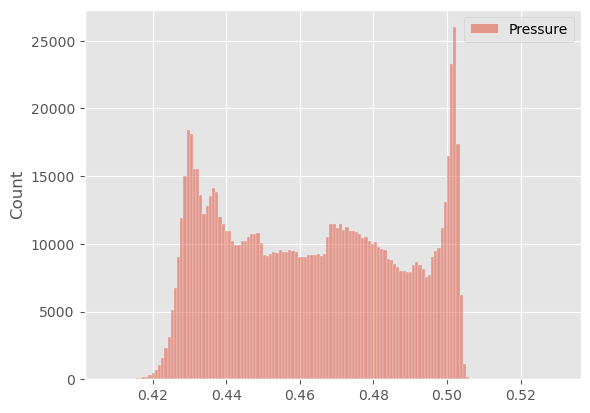

In [190]:
sns.histplot(previsão,)

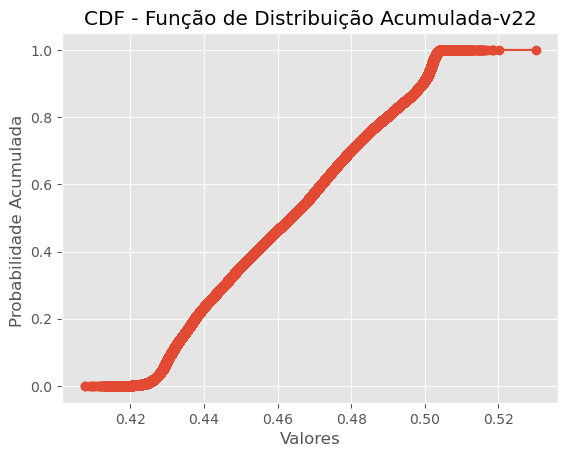

0    0.075126
dtype: float64


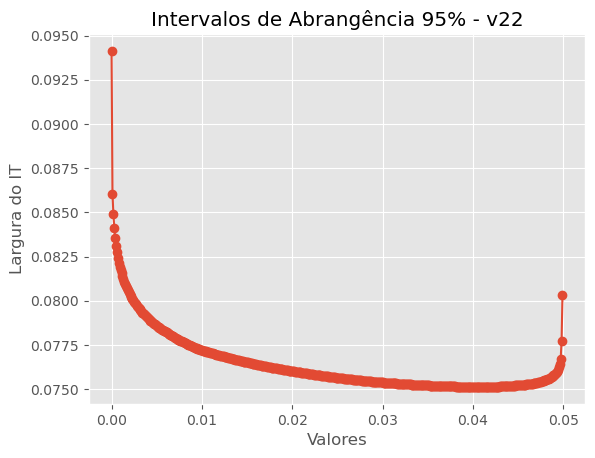

In [191]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v22')
plt.grid(True)
plt.show()

minvalue_IT22 = res.min()
print(minvalue_IT22)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v22')
plt.grid(True)
plt.show()

In [192]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_22= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_22= inverse_cdf(percentile2)
print(ymin_22)
print(ymax_22)

0.42818155884742737
0.5033071041107178


# simulação mc v23

In [193]:
i=23
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC23=np.std(previsão)
MMC23=np.mean(previsão)

31250/31250 [==============================] - 17s 533us/step


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot:ylabel='Count'>

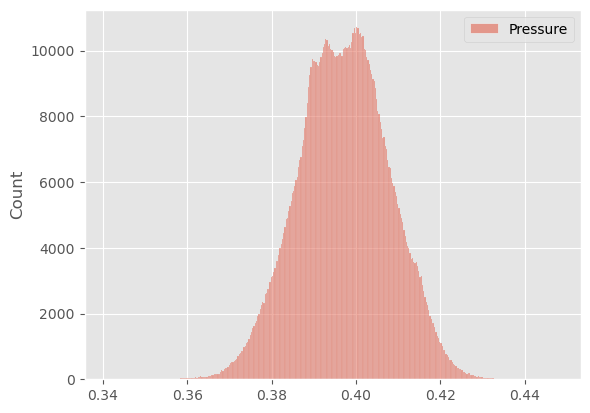

In [194]:
sns.histplot(previsão,)

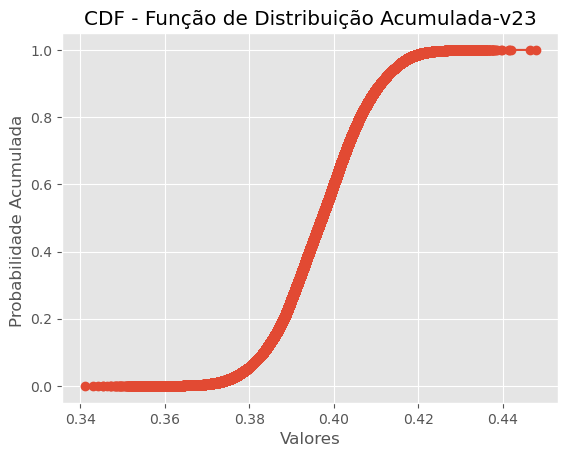

0    0.04152
dtype: float64


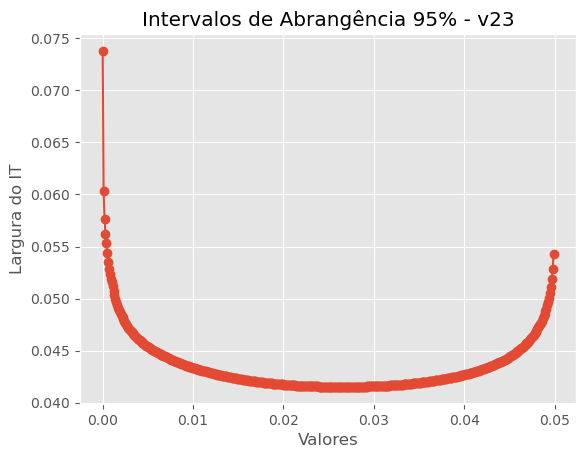

In [195]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v23')
plt.grid(True)
plt.show()

minvalue_IT23 = res.min()
print(minvalue_IT23)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v23')
plt.grid(True)
plt.show()

In [196]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_23= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_23= inverse_cdf(percentile2)
print(ymin_23)
print(ymax_23)

0.37638622522354126
0.41790616512298573


# simulação mc v24

In [197]:
i=24
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC24=np.std(previsão)
MMC24=np.mean(previsão)

31250/31250 [==============================] - 17s 538us/step


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot:ylabel='Count'>

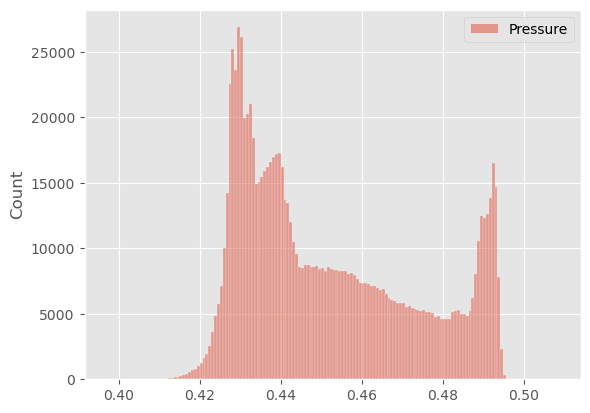

In [198]:
sns.histplot(previsão,)

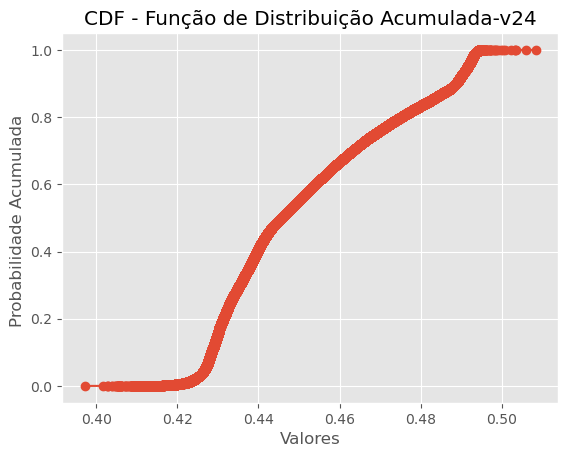

0    0.067265
dtype: float64


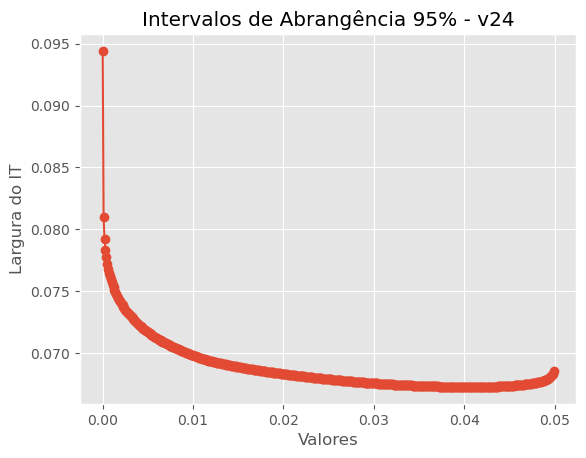

In [199]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v24')
plt.grid(True)
plt.show()

minvalue_IT24 = res.min()
print(minvalue_IT24)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v24')
plt.grid(True)
plt.show()

In [200]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_24= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_24= inverse_cdf(percentile2)
print(ymin_24)
print(ymax_24)

0.42629653215408325
0.4935612678527832


# simulação mc v25

In [201]:
i=25
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC25=np.std(previsão)
MMC25=np.mean(previsão)

31250/31250 [==============================] - 17s 531us/step


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot:ylabel='Count'>

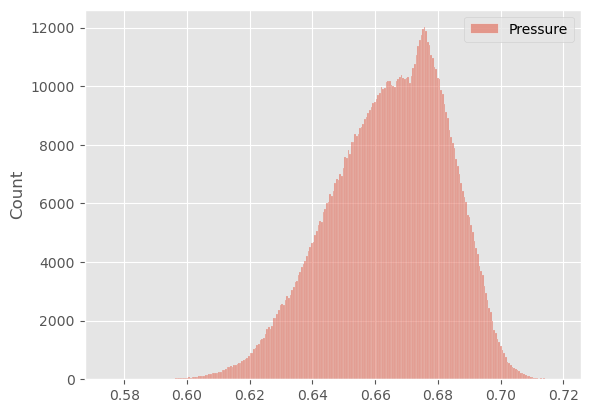

In [202]:
sns.histplot(previsão,)

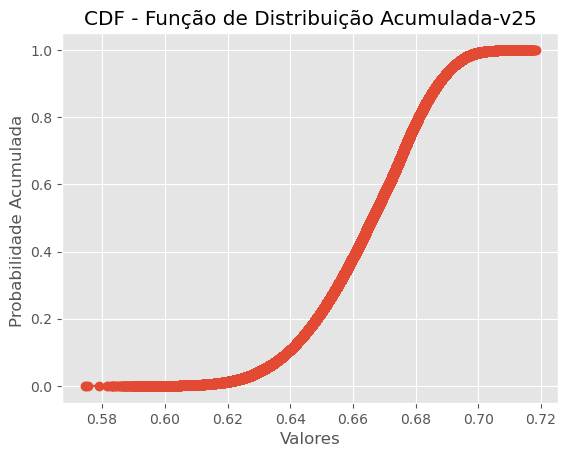

0    0.069225
dtype: float64


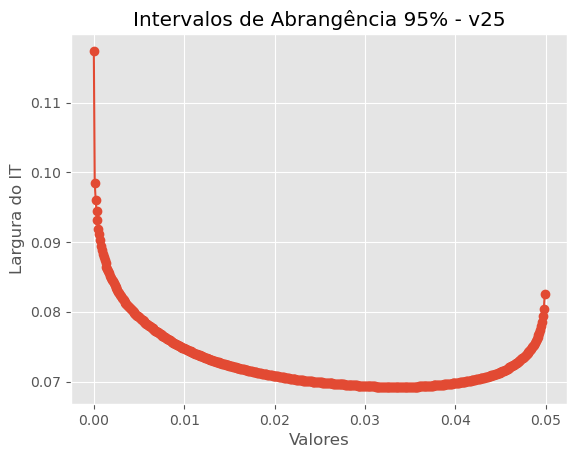

In [203]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v25')
plt.grid(True)
plt.show()

minvalue_IT25 = res.min()
print(minvalue_IT25)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v25')
plt.grid(True)
plt.show()

In [204]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_25= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_25= inverse_cdf(percentile2)
print(ymin_25)
print(ymax_25)

0.6282014846801758
0.6974270343780518


# simulação mc v26

In [205]:
i=26
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC26=np.std(previsão)
MMC26=np.mean(previsão)

31250/31250 [==============================] - 17s 529us/step


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot:ylabel='Count'>

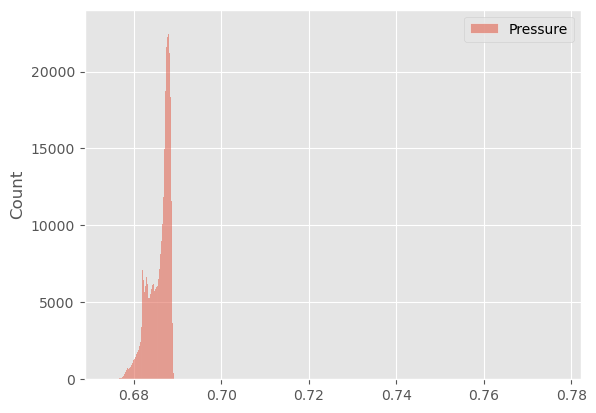

In [206]:
sns.histplot(previsão,)

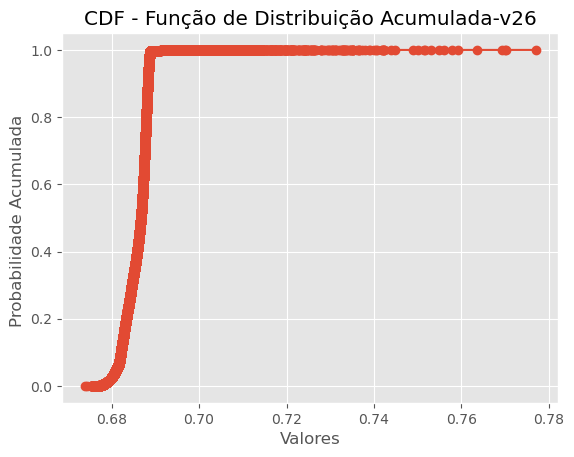

0    0.007899
dtype: float64


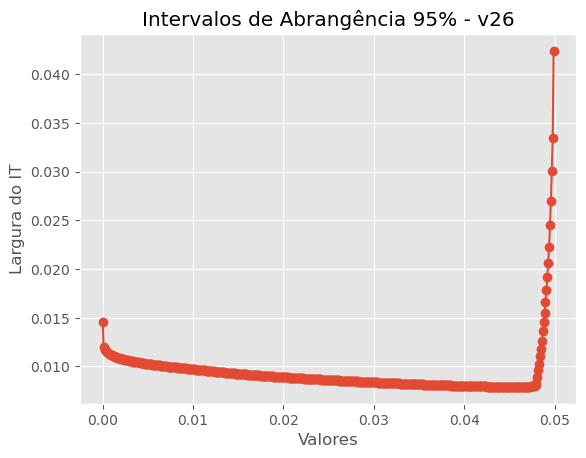

In [207]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v26')
plt.grid(True)
plt.show()

minvalue_IT26 = res.min()
print(minvalue_IT26)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v26')
plt.grid(True)
plt.show()

In [208]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_26= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_26= inverse_cdf(percentile2)
print(ymin_26)
print(ymax_26)

0.680996298789978
0.6888952255249023


# simulação mc v27

In [209]:
i=27
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC27=np.std(previsão)
MMC27=np.mean(previsão)

31250/31250 [==============================] - 17s 541us/step


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot:ylabel='Count'>

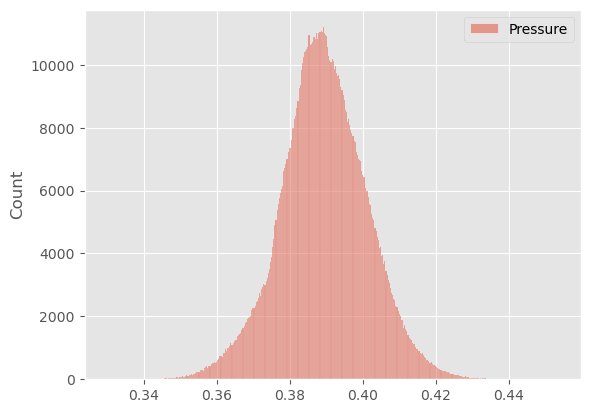

In [210]:
sns.histplot(previsão,)

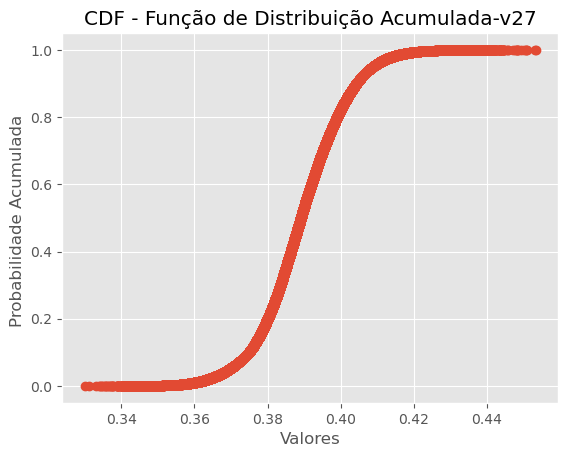

0    0.047893
dtype: float64


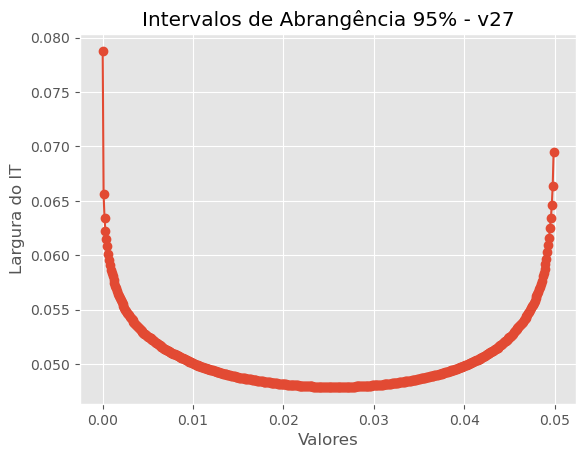

In [211]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v27')
plt.grid(True)
plt.show()

minvalue_IT27 = res.min()
print(minvalue_IT27)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v27')
plt.grid(True)
plt.show()

In [212]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_27= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_27= inverse_cdf(percentile2)
print(ymin_27)
print(ymax_27)

0.3651443421840668
0.4130380451679229


# simulação mc v28

In [213]:
i=28
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC28=np.std(previsão)
MMC28=np.mean(previsão)

31250/31250 [==============================] - 17s 559us/step


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot:ylabel='Count'>

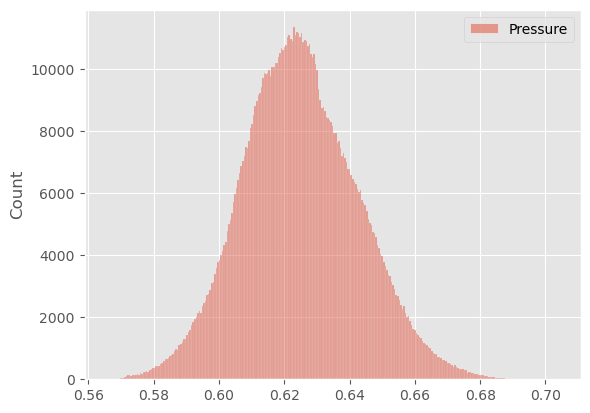

In [214]:
sns.histplot(previsão,)

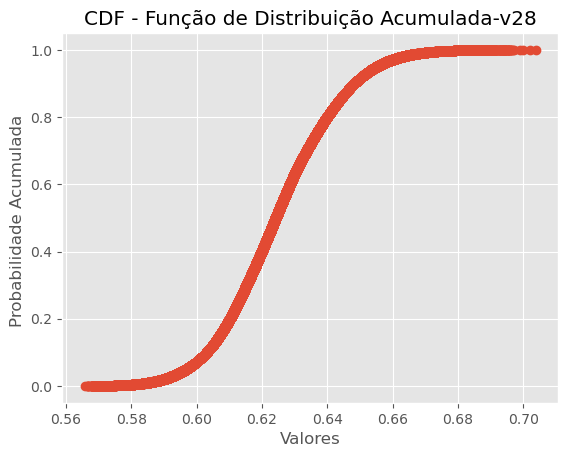

0    0.069655
dtype: float64


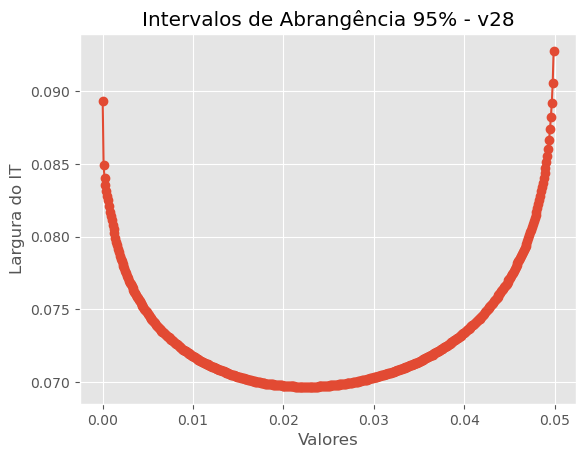

In [215]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v28')
plt.grid(True)
plt.show()

minvalue_IT28 = res.min()
print(minvalue_IT28)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v28')
plt.grid(True)
plt.show()

In [216]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_28= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_28= inverse_cdf(percentile2)
print(ymin_28)
print(ymax_28)

0.5907162427902222
0.660371720790863


# simulação mc v29

In [217]:
i=29
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC29=np.std(previsão)
MMC29=np.mean(previsão)

31250/31250 [==============================] - 17s 535us/step


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot:ylabel='Count'>

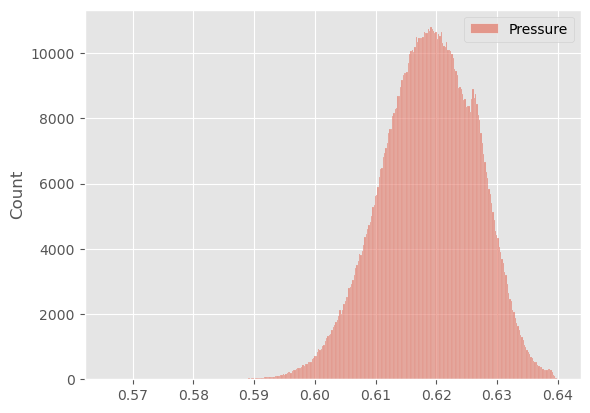

In [218]:
sns.histplot(previsão,)

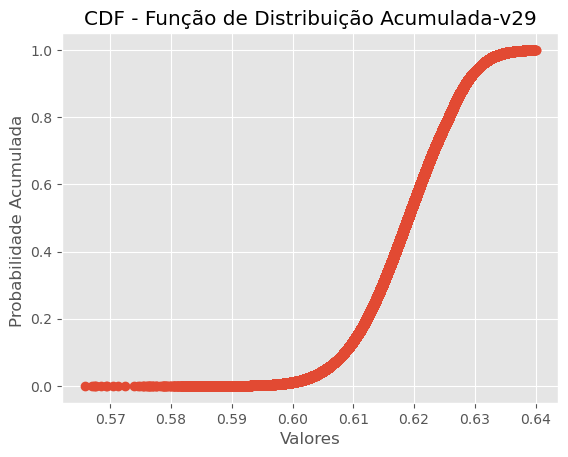

0    0.029668
dtype: float64


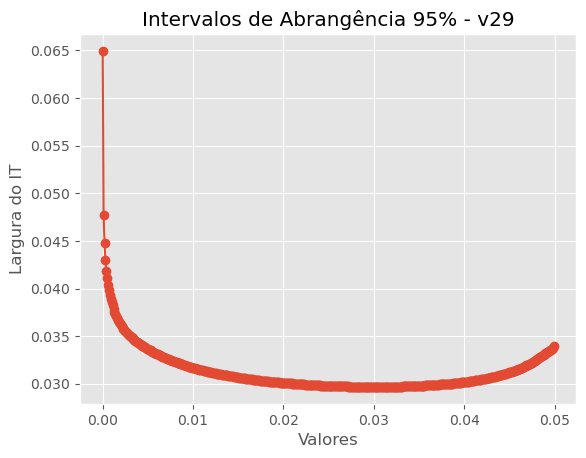

In [219]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v29')
plt.grid(True)
plt.show()

minvalue_IT29 = res.min()
print(minvalue_IT29)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v29')
plt.grid(True)
plt.show()

In [220]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_29= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_29= inverse_cdf(percentile2)
print(ymin_29)
print(ymax_29)

0.6034945249557495
0.6331630349159241


# simulação mc v30

In [221]:
i=30
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC30=np.std(previsão)
MMC30=np.mean(previsão)

31250/31250 [==============================] - 18s 578us/step


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot:ylabel='Count'>

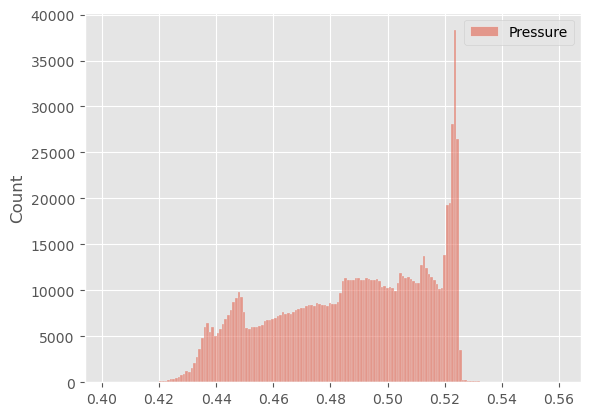

In [222]:
sns.histplot(previsão,)

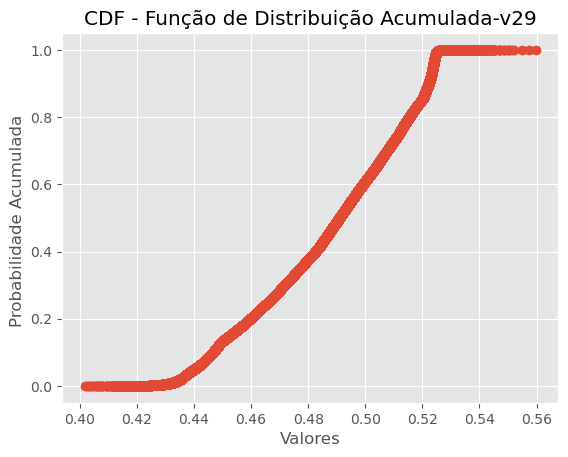

0    0.085821
dtype: float64


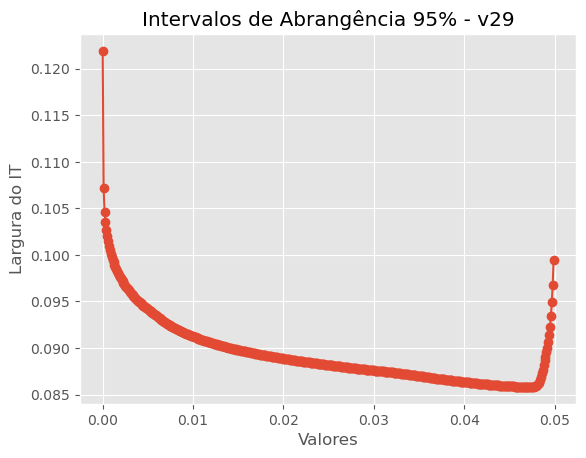

In [223]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v29')
plt.grid(True)
plt.show()

minvalue_IT30 = res.min()
print(minvalue_IT30)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v29')
plt.grid(True)
plt.show()

In [224]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_30= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_30= inverse_cdf(percentile2)
print(ymin_30)
print(ymax_30)

0.43955469131469727
0.5253761410713196


In [225]:
UMC=[UMC0,UMC1,UMC2,UMC3,UMC4,UMC5,UMC6,UMC7,UMC8,UMC9,UMC10,UMC11,UMC12,UMC13,UMC14,UMC15,UMC16,UMC17,UMC18,UMC19,UMC20,UMC21,UMC22,UMC23,
     UMC24,UMC25,UMC26,UMC27,UMC28,UMC29,UMC30]

In [226]:
MMC=[MMC0,MMC1,MMC2,MMC3,MMC4,MMC5,MMC6,MMC7,MMC8,MMC9,MMC10,MMC11,MMC12,MMC13,MMC14,MMC15,MMC16,MMC17,MMC18,MMC19,MMC20,MMC21,MMC22,MMC23,
     MMC24,MMC25,MMC26,MMC27,MMC28,MMC29,MMC30]

In [227]:
YMIN=[ymin_0,ymin_1,ymin_2,ymin_3,ymin_4,ymin_5,ymin_6,ymin_7,ymin_8,ymin_9,ymin_10,ymin_11,ymin_12,ymin_13,ymin_14,ymin_15,ymin_16,ymin_17,ymin_18,ymin_19,ymin_20,ymin_21,ymin_22,ymin_23,ymin_24,ymin_25,ymin_26,ymin_27,ymin_28,ymin_29,ymin_30,]

In [228]:
YMAX=[ymax_0,ymax_1,ymax_2,ymax_3,ymax_4,ymax_5,ymax_6,ymax_7,ymax_8,ymax_9,ymax_10,ymax_11,ymax_12,ymax_13,ymax_14,ymax_15,ymax_16,ymax_17,ymax_18,ymax_19,ymax_20,ymax_21,ymax_22,ymax_23,ymax_24,ymax_25,ymax_26,ymax_27,ymax_28,ymax_29,ymax_30,]

In [229]:
UMC=pd.DataFrame(UMC)

In [230]:
MMC=pd.DataFrame(MMC)

In [231]:
YMIN=pd.DataFrame(YMIN)

In [232]:
YMIN

,0
0,0.600837
1,0.668792
2,0.691740
3,0.379257
4,0.577727
5,0.669583
6,0.369156
7,0.571077
8,0.639325
9,0.667226


In [233]:
YMAX=pd.DataFrame(YMAX)

In [234]:
YMAX

,0
0,0.612929
1,0.699927
2,0.713208
3,0.456675
4,0.700928
5,0.752751
6,0.511430
7,0.633977
8,0.672146
9,0.695295


In [235]:
#MCCC=pd.concat([df.total[5],df.total['Predict'],MMC,UMC,2*df.total['ucca'],df.total['ucce'],df.total['ucc'],df.total['U']],axis=1)

In [236]:
df.total['Predict']

0     0.606187
1     0.693081
2     0.694494
3     0.417326
4     0.649842
5     0.700766
6     0.429945
7     0.599793
8     0.655089
9     0.691929
10    0.610750
11    0.577041
12    0.571263
13    0.799382
14    0.687654
15    0.792026
16    0.559969
17    0.377135
18    0.498533
19    0.431544
20    0.372843
21    0.401925
22    0.463394
23    0.397137
24    0.445697
25    0.666324
26    0.687363
27    0.389090
28    0.624210
29    0.618979
30    0.490930
Name: Predict, dtype: float32

In [237]:
2*df.total['ucca']

0     0.008319
1     0.015228
2     0.012889
3     0.036349
4     0.065859
5     0.056957
6     0.067971
7     0.033129
8     0.019059
9     0.018649
10    0.021500
11    0.017779
12    0.020795
13    0.015765
14    0.021408
15    0.021019
16    0.014915
17    0.016263
18    0.035029
19    0.011423
20    0.025303
21    0.019510
22    0.075466
23    0.022970
24    0.066750
25    0.045202
26    0.006721
27    0.022099
28    0.036200
29    0.018308
30    0.064919
Name: ucca, dtype: float32

In [238]:
#df.total['c1']=(df.total['Predict Deltax1']-df.total['Predict'])/h1

In [239]:
MCCC=pd.concat([df.total['Predict'],2*df.total['ucca'],YMIN,YMAX],axis=1)

In [240]:
# Definir os nomes das colunas
nomes_colunas = ['y','Up','y_inf','y_max']

# Atribuir os nomes das colunas ao DataFrame
MCCC.columns = nomes_colunas



In [241]:
MCCC

,y,Up,y_inf,y_max
0,0.606187,0.008319,0.600837,0.612929
1,0.693081,0.015228,0.668792,0.699927
2,0.694494,0.012889,0.691740,0.713208
3,0.417326,0.036349,0.379257,0.456675
4,0.649842,0.065859,0.577727,0.700928
5,0.700766,0.056957,0.669583,0.752751
6,0.429945,0.067971,0.369156,0.511430
7,0.599793,0.033129,0.571077,0.633977
8,0.655089,0.019059,0.639325,0.672146
9,0.691929,0.018649,0.667226,0.695295


In [242]:
MCCC['d_inf']=abs(MCCC['y']-MCCC['Up']-MCCC['y_inf'])

In [243]:
MCCC['d_sup']=abs(MCCC['y']+MCCC['Up']-MCCC['y_max'])

In [244]:
MCCC['tolerance_l']=0.005

In [245]:
# Definir os nomes das colunas
nomes_colunas = ['y','Up','y_inf','y_max','d_inf','d_sup','Tolerance']

# Atribuir os nomes das colunas ao DataFrame
MCCC.columns = nomes_colunas



In [246]:
pip install pygwalker

Note: you may need to restart the kernel to use updated packages.


In [247]:
import pygwalker as pyg

In [248]:
pyg.walk(MCCC)

Box(children=(HTML(value='<div id="ifr-pyg-0" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

In [249]:
#MCCC.to_excel('MCCC.xlsx')

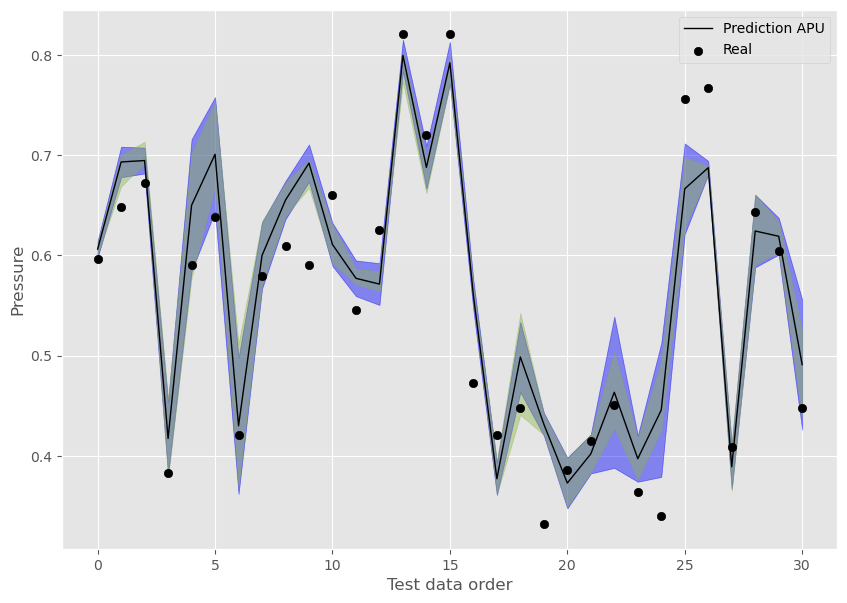

In [250]:
n = 31
t = range(n) 

plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(t, MCCC['y'], label='Prediction APU', color="Black", lw=1)

for shade in range(1, 5):
    plt.fill_between(t, MCCC['y']-MCCC['Up'],  MCCC['y']+MCCC['Up'], alpha=0.13, color="blue")
for shade in range(1, 5):
    plt.fill_between(t, MCCC['y_inf'],  MCCC['y_max'], alpha=0.12, color="C5")
   
plt.scatter(t, df.total[5], color="black", label="Real")
plt.ylabel("Pressure")
plt.xlabel("Test data order")
plt.legend(loc="best")
f.savefig("rnn_demanda_test6.pdf")
plt.show()

In [ ]:
MCCC

In [253]:
MCCC.to_excel('MCCC.xlsx')